In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Loading data

In [2]:
%cd ./alb-logs

/Users/markojankuleski/Documents/Diplomski/alb-logs


In [3]:
def read_data(csv_file):
    csv_file_df = pd.read_csv(csv_file, sep=" ", header=0)
    return csv_file_df

In [4]:
alb_logs_20230503_df = read_data("alb-logs-20230503.csv")
alb_logs_20230503_df.head()

,type,time,elb,client_port,target_port,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,...,chosen_cert_arn,matched_rule_priority,request_creation_time,actions_executed,redirect_url,error_reason,target_port_list,target_status_code_list,classification,classification_reason
0,h2,2023-05-02T23:55:00.853383Z,app/public-alb-123/321,107.122.173.65:17237,190.61.210.122:64070,0.000,0.143,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-02T23:55:00.709000Z,forward,-,-,172.32.152.128:9090,200,-,-
1,h2,2023-05-02T23:55:00.909122Z,app/public-alb-123/321,47.4.248.170:52851,190.61.210.122:64070,0.000,0.191,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-02T23:55:00.717000Z,forward,-,-,172.32.152.128:9090,200,-,-
2,h2,2023-05-02T23:55:01.979531Z,app/public-alb-123/321,98.216.85.196:59207,190.61.210.122:64070,0.001,0.181,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-02T23:55:01.797000Z,forward,-,-,172.32.192.244:9090,200,-,-
3,h2,2023-05-02T23:55:02.052758Z,app/public-alb-123/321,107.209.189.224:62063,190.61.210.122:64070,0.000,0.198,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-02T23:55:01.853000Z,forward,-,-,172.32.152.128:9090,200,-,-
4,h2,2023-05-02T23:55:02.551542Z,app/public-alb-123/321,174.194.195.193:9335,190.61.210.122:64070,0.001,0.212,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-02T23:55:02.338000Z,forward,-,-,172.32.192.244:9090,200,-,-


In [5]:
alb_logs_20230503_df.shape

(434227, 29)

In [6]:
alb_logs_20230503_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434227 entries, 0 to 434226
Columns: 29 entries, type to classification_reason
dtypes: float64(3), int64(4), object(22)
memory usage: 750.2 MB


In [7]:
alb_logs_20230504_df = read_data("alb-logs-20230504.csv")
alb_logs_20230504_df.head()

,type,time,elb,client_port,target_port,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,...,chosen_cert_arn,matched_rule_priority,request_creation_time,actions_executed,redirect_url,error_reason,target_port_list,target_status_code_list,classification,classification_reason
0,h2,2023-05-03T23:55:00.936341Z,app/public-alb-123/321,37.156.75.215:28412,107.110.171.34:60339,0.001,0.194,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:00.741000Z,forward,-,-,172.32.192.244:9090,200,-,-
1,h2,2023-05-03T23:55:00.980508Z,app/public-alb-123/321,47.160.169.68:55292,107.110.171.34:60339,0.001,0.444,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:00.535000Z,forward,-,-,172.32.192.244:9090,200,-,-
2,h2,2023-05-03T23:55:01.031178Z,app/public-alb-123/321,96.64.32.210:64670,107.110.171.34:60339,0.000,0.221,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:00.809000Z,forward,-,-,172.32.152.128:9090,200,-,-
3,h2,2023-05-03T23:55:01.230494Z,app/public-alb-123/321,174.198.132.80:12554,107.110.171.34:60339,0.001,0.238,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:00.991000Z,forward,-,-,172.32.192.244:9090,200,-,-
4,h2,2023-05-03T23:55:01.504385Z,app/public-alb-123/321,67.255.72.176:59368,107.110.171.34:60339,0.000,0.172,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:01.332000Z,forward,-,-,172.32.152.128:9090,200,-,-


In [8]:
alb_logs_20230504_df.shape

(430616, 29)

In [9]:
alb_logs_20230504_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430616 entries, 0 to 430615
Columns: 29 entries, type to classification_reason
dtypes: float64(3), int64(4), object(22)
memory usage: 743.9 MB


In [10]:
alb_logs_20230505_df = read_data("alb-logs-20230505.csv")
alb_logs_20230505_df.head()

,type,time,elb,client_port,target_port,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,...,chosen_cert_arn,matched_rule_priority,request_creation_time,actions_executed,redirect_url,error_reason,target_port_list,target_status_code_list,classification,classification_reason
0,h2,2023-05-04T23:55:01.395623Z,app/public-alb-123/321,50.34.161.129:59998,190.21.190.209:62584,0.001,0.216,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-04T23:55:01.178000Z,forward,-,-,172.32.192.244:9090,200,-,-
1,h2,2023-05-04T23:55:02.192334Z,app/public-alb-123/321,73.140.76.96:57108,190.21.190.209:62584,0.000,0.219,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-04T23:55:01.973000Z,forward,-,-,172.32.152.128:9090,200,-,-
2,h2,2023-05-04T23:55:02.937865Z,app/public-alb-123/321,174.203.41.164:1322,190.21.190.209:62584,0.001,0.788,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-04T23:55:02.148000Z,forward,-,-,172.32.192.244:9090,200,-,-
3,h2,2023-05-04T23:55:03.092185Z,app/public-alb-123/321,201.86.1.160:62513,190.21.190.209:62584,0.001,0.175,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-04T23:55:02.916000Z,forward,-,-,172.32.152.128:9090,200,-,-
4,h2,2023-05-04T23:55:03.147868Z,app/public-alb-123/321,107.209.119.256:57621,190.21.190.209:62584,0.001,0.138,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-04T23:55:03.008000Z,forward,-,-,172.32.152.128:9090,200,-,-


In [11]:
alb_logs_20230505_df.shape

(408711, 29)

In [12]:
alb_logs_20230505_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408711 entries, 0 to 408710
Columns: 29 entries, type to classification_reason
dtypes: float64(3), int64(4), object(22)
memory usage: 706.0 MB


In [13]:
alb_logs_20230506_df = read_data("alb-logs-20230506.csv")
alb_logs_20230506_df.head()

,type,time,elb,client_port,target_port,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,...,chosen_cert_arn,matched_rule_priority,request_creation_time,actions_executed,redirect_url,error_reason,target_port_list,target_status_code_list,classification,classification_reason
0,h2,2023-05-05T23:55:01.722333Z,app/public-alb-123/321,70.67.230.258:61085,87.235.164.236:52894,0.001,0.382,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-05T23:55:01.339000Z,forward,-,-,172.32.196.19:9090,200,-,-
1,h2,2023-05-05T23:55:01.272426Z,app/public-alb-123/321,74.131.152.199:56407,87.235.164.236:52894,0.001,0.341,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-05T23:55:00.930000Z,forward,-,-,172.32.196.19:9090,200,-,-
2,h2,2023-05-05T23:55:02.580559Z,app/public-alb-123/321,174.198.15.31:2166,87.235.164.236:52894,0.000,0.199,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-05T23:55:02.380000Z,forward,-,-,172.32.128.80:9090,200,-,-
3,h2,2023-05-05T23:55:02.073443Z,app/public-alb-123/321,98.11.145.152:59359,87.235.164.236:52894,0.000,0.248,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-05T23:55:01.824000Z,forward,-,-,172.32.128.80:9090,200,-,-
4,h2,2023-05-05T23:55:02.190610Z,app/public-alb-123/321,97.131.37.13:53174,87.235.164.236:52894,0.001,0.221,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-05T23:55:01.968000Z,forward,-,-,172.32.196.19:9090,200,-,-


In [14]:
alb_logs_20230506_df.shape

(406055, 29)

In [15]:
alb_logs_20230506_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406055 entries, 0 to 406054
Columns: 29 entries, type to classification_reason
dtypes: float64(3), int64(4), object(22)
memory usage: 701.3 MB


In [16]:
alb_logs_20230507_df = read_data("alb-logs-20230507.csv")
alb_logs_20230507_df.head()

,type,time,elb,client_port,target_port,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,...,chosen_cert_arn,matched_rule_priority,request_creation_time,actions_executed,redirect_url,error_reason,target_port_list,target_status_code_list,classification,classification_reason
0,h2,2023-05-06T23:55:00.967687Z,app/public-alb-123/321,174.58.39.113:55205,90.128.202.176:56383,0.001,0.192,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-06T23:55:00.774000Z,forward,-,-,172.32.201.214:9090,200,-,-
1,h2,2023-05-06T23:55:00.673873Z,app/public-alb-123/321,2.25.225.199:54463,90.128.202.176:56383,0.001,0.167,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-06T23:55:00.505000Z,forward,-,-,172.32.201.214:9090,200,-,-
2,h2,2023-05-06T23:55:02.529489Z,app/public-alb-123/321,174.58.39.113:55205,90.128.202.176:56383,0.000,0.218,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-06T23:55:02.310000Z,forward,-,-,172.32.163.158:9090,200,-,-
3,h2,2023-05-06T23:55:02.947010Z,app/public-alb-123/321,101.184.34.124:57343,90.128.202.176:56383,0.000,0.239,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-06T23:55:02.707000Z,forward,-,-,172.32.163.158:9090,200,-,-
4,h2,2023-05-06T23:55:03.391870Z,app/public-alb-123/321,134.215.147.200:58231,90.128.202.176:56383,0.001,0.185,0.0,200,200,...,session-reused,1660,2023-05-06T23:55:03.206000Z,forward,-,-,172.32.201.214:9090,200,-,-


In [17]:
alb_logs_20230507_df.shape

(407912, 29)

In [18]:
alb_logs_20230507_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407912 entries, 0 to 407911
Columns: 29 entries, type to classification_reason
dtypes: float64(3), int64(4), object(22)
memory usage: 704.7 MB


In [19]:
alb_logs_20230508_df = read_data("alb-logs-20230508.csv")
alb_logs_20230508_df.head()

,type,time,elb,client_port,target_port,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,...,chosen_cert_arn,matched_rule_priority,request_creation_time,actions_executed,redirect_url,error_reason,target_port_list,target_status_code_list,classification,classification_reason
0,h2,2023-05-07T23:55:00.876785Z,app/public-alb-123/321,24.4.225.92:57628,89.14.84.181:56673,0.001,0.175,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-07T23:55:00.701000Z,forward,-,-,172.32.201.214:9090,200,-,-
1,h2,2023-05-07T23:55:01.232898Z,app/public-alb-123/321,68.3.176.126:53034,89.14.84.181:56673,0.000,0.237,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-07T23:55:00.994000Z,forward,-,-,172.32.163.158:9090,200,-,-
2,h2,2023-05-07T23:55:01.523544Z,app/public-alb-123/321,141.155.142.218:57793,89.14.84.181:56673,0.001,0.229,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-07T23:55:01.293000Z,forward,-,-,172.32.201.214:9090,200,-,-
3,h2,2023-05-07T23:55:02.086095Z,app/public-alb-123/321,136.53.116.70:64371,89.14.84.181:56673,0.001,0.615,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-07T23:55:01.470000Z,forward,-,-,172.32.163.158:9090,200,-,-
4,h2,2023-05-07T23:55:03.317911Z,app/public-alb-123/321,107.116.79.117:53685,89.14.84.181:56673,0.001,0.193,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-07T23:55:03.123000Z,forward,-,-,172.32.201.214:9090,200,-,-


In [20]:
alb_logs_20230508_df.shape

(454844, 29)

In [21]:
alb_logs_20230508_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454844 entries, 0 to 454843
Columns: 29 entries, type to classification_reason
dtypes: float64(3), int64(4), object(22)
memory usage: 785.0 MB


In [22]:
alb_logs_20230509_df = read_data("alb-logs-20230509.csv")
alb_logs_20230509_df.head()

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1599/2062051008.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_file_df = pd.read_csv(csv_file, sep=" ", header=0)


,type,time,elb,client_port,target_port,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,...,chosen_cert_arn,matched_rule_priority,request_creation_time,actions_executed,redirect_url,error_reason,target_port_list,target_status_code_list,classification,classification_reason
0,h2,2023-05-08T23:55:00.959261Z,app/public-alb-123/321,71.184.224.12:60316,188.56.153.103:35108,0.000,0.206,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-08T23:55:00.753000Z,forward,-,-,172.32.197.210:9090,200,-,-
1,h2,2023-05-08T23:55:01.869956Z,app/public-alb-123/321,104.171.82.236:57117,188.56.153.103:35108,0.000,0.214,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-08T23:55:01.655000Z,forward,-,-,172.32.197.210:9090,200,-,-
2,h2,2023-05-08T23:55:02.385119Z,app/public-alb-123/321,24.59.91.45:57993,188.56.153.103:35108,0.001,0.202,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-08T23:55:02.182000Z,forward,-,-,172.32.174.122:9090,200,-,-
3,h2,2023-05-08T23:55:02.562282Z,app/public-alb-123/321,137.186.167.234:65231,188.56.153.103:35108,0.000,0.200,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-08T23:55:02.362000Z,forward,-,-,172.32.197.210:9090,200,-,-
4,h2,2023-05-08T23:55:02.442619Z,app/public-alb-123/321,65.24.86.212:63212,188.56.153.103:35108,0.000,0.426,0.0,200,200,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-08T23:55:02.016000Z,forward,-,-,172.32.213.203:9090,200,-,-


In [23]:
alb_logs_20230509_df.shape

(468928, 29)

In [24]:
alb_logs_20230509_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468928 entries, 0 to 468927
Columns: 29 entries, type to classification_reason
dtypes: float64(3), int64(3), object(23)
memory usage: 825.2 MB


## Data preprocessing

## alb_logs_20230503

In [25]:
alb_logs_20230503_df.time = pd.to_datetime(alb_logs_20230503_df.time).dt.tz_convert(None)
alb_logs_20230503_df.time.head()

0   2023-05-02 23:55:00.853383
1   2023-05-02 23:55:00.909122
2   2023-05-02 23:55:01.979531
3   2023-05-02 23:55:02.052758
4   2023-05-02 23:55:02.551542
Name: time, dtype: datetime64[ns]

In [26]:
alb_logs_20230503_df_nans = alb_logs_20230503_df.isna().sum()
alb_logs_20230503_df_nans[alb_logs_20230503_df_nans > 0]

classification_reason    5
dtype: int64

In [27]:
alb_logs_20230503_df.classification_reason.head()

0    -
1    -
2    -
3    -
4    -
Name: classification_reason, dtype: object

In [28]:
alb_logs_20230503_df.classification_reason[alb_logs_20230503_df.classification_reason != '-']

50716     NaN
198864    NaN
200203    NaN
272596    NaN
325480    NaN
Name: classification_reason, dtype: object

In [29]:
alb_logs_20230503_df.drop(labels=["classification_reason"], axis=1, inplace=True)

In [30]:
def drop_zero_variance_columns(df):
    for column in df.columns:
        if len(np.unique(df[column])) == 1:
            df.drop(column, axis=1, inplace=True)

In [31]:
drop_zero_variance_columns(alb_logs_20230503_df)
alb_logs_20230503_df.shape

(434227, 25)

## alb_logs_20230504

In [32]:
alb_logs_20230504_df.time = pd.to_datetime(alb_logs_20230504_df.time).dt.tz_convert(None)
alb_logs_20230504_df.time.head()

0   2023-05-03 23:55:00.936341
1   2023-05-03 23:55:00.980508
2   2023-05-03 23:55:01.031178
3   2023-05-03 23:55:01.230494
4   2023-05-03 23:55:01.504385
Name: time, dtype: datetime64[ns]

In [33]:
alb_logs_20230504_df_nans = alb_logs_20230504_df.isna().sum()
alb_logs_20230504_df_nans[alb_logs_20230504_df_nans > 0]

classification_reason    1
dtype: int64

In [34]:
alb_logs_20230504_df.classification_reason.head()

0    -
1    -
2    -
3    -
4    -
Name: classification_reason, dtype: object

In [35]:
alb_logs_20230504_df.classification_reason[alb_logs_20230504_df.classification_reason != '-']

287932    NaN
Name: classification_reason, dtype: object

In [36]:
alb_logs_20230504_df.drop(labels=["classification_reason"], axis=1, inplace=True)

In [37]:
drop_zero_variance_columns(alb_logs_20230504_df)
alb_logs_20230504_df.shape

(430616, 25)

## alb_logs_20230505

In [38]:
alb_logs_20230505_df.time = pd.to_datetime(alb_logs_20230505_df.time).dt.tz_convert(None)
alb_logs_20230505_df.time.head()

0   2023-05-04 23:55:01.395623
1   2023-05-04 23:55:02.192334
2   2023-05-04 23:55:02.937865
3   2023-05-04 23:55:03.092185
4   2023-05-04 23:55:03.147868
Name: time, dtype: datetime64[ns]

In [39]:
alb_logs_20230505_df_nans = alb_logs_20230505_df.isna().sum()
alb_logs_20230505_df_nans[alb_logs_20230505_df_nans > 0]

classification_reason    4
dtype: int64

In [40]:
alb_logs_20230505_df.classification_reason.head()

0    -
1    -
2    -
3    -
4    -
Name: classification_reason, dtype: object

In [41]:
alb_logs_20230505_df.classification_reason[alb_logs_20230505_df.classification_reason != '-']

109920                                NaN
116993                                NaN
121921                                NaN
277064                                NaN
312239    UndefinedContentLengthSemantics
Name: classification_reason, dtype: object

In [42]:
alb_logs_20230505_df.drop(labels=["classification_reason"], axis=1, inplace=True)

In [43]:
drop_zero_variance_columns(alb_logs_20230505_df)
alb_logs_20230505_df.shape

(408711, 26)

## alb_logs_20230506

In [44]:
alb_logs_20230506_df.time = pd.to_datetime(alb_logs_20230506_df.time).dt.tz_convert(None)
alb_logs_20230506_df.time.head()

0   2023-05-05 23:55:01.722333
1   2023-05-05 23:55:01.272426
2   2023-05-05 23:55:02.580559
3   2023-05-05 23:55:02.073443
4   2023-05-05 23:55:02.190610
Name: time, dtype: datetime64[ns]

In [45]:
alb_logs_20230506_df_nans = alb_logs_20230506_df.isna().sum()
alb_logs_20230506_df_nans[alb_logs_20230506_df_nans > 0]

Series([], dtype: int64)

In [46]:
drop_zero_variance_columns(alb_logs_20230506_df)
alb_logs_20230506_df.shape

(406055, 25)

## alb_logs_20230507

In [47]:
alb_logs_20230507_df.time = pd.to_datetime(alb_logs_20230507_df.time).dt.tz_convert(None)
alb_logs_20230507_df.time.head()

0   2023-05-06 23:55:00.967687
1   2023-05-06 23:55:00.673873
2   2023-05-06 23:55:02.529489
3   2023-05-06 23:55:02.947010
4   2023-05-06 23:55:03.391870
Name: time, dtype: datetime64[ns]

In [48]:
alb_logs_20230507_df_nans = alb_logs_20230507_df.isna().sum()
alb_logs_20230507_df_nans[alb_logs_20230507_df_nans > 0]

Series([], dtype: int64)

In [49]:
drop_zero_variance_columns(alb_logs_20230507_df)
alb_logs_20230507_df.shape

(407912, 25)

## alb_logs_20230508

In [50]:
alb_logs_20230508_df.time = pd.to_datetime(alb_logs_20230508_df.time).dt.tz_convert(None)
alb_logs_20230508_df.time.head()

0   2023-05-07 23:55:00.876785
1   2023-05-07 23:55:01.232898
2   2023-05-07 23:55:01.523544
3   2023-05-07 23:55:02.086095
4   2023-05-07 23:55:03.317911
Name: time, dtype: datetime64[ns]

In [51]:
alb_logs_20230508_df_nans = alb_logs_20230508_df.isna().sum()
alb_logs_20230508_df_nans[alb_logs_20230508_df_nans > 0]

Series([], dtype: int64)

In [52]:
drop_zero_variance_columns(alb_logs_20230508_df)
alb_logs_20230508_df.shape

(454844, 25)

## alb_logs_20230509

In [53]:
alb_logs_20230509_df.time = pd.to_datetime(alb_logs_20230509_df.time).dt.tz_convert(None)
alb_logs_20230509_df.time.head()

0   2023-05-08 23:55:00.959261
1   2023-05-08 23:55:01.869956
2   2023-05-08 23:55:02.385119
3   2023-05-08 23:55:02.562282
4   2023-05-08 23:55:02.442619
Name: time, dtype: datetime64[ns]

In [54]:
alb_logs_20230509_df_nans = alb_logs_20230509_df.isna().sum()
alb_logs_20230509_df_nans[alb_logs_20230509_df_nans > 0]

classification_reason    19
dtype: int64

In [55]:
alb_logs_20230509_df.classification_reason.head()

0    -
1    -
2    -
3    -
4    -
Name: classification_reason, dtype: object

In [56]:
alb_logs_20230509_df.classification_reason[alb_logs_20230509_df.classification_reason != '-']

404516    NaN
404518    NaN
405190    NaN
405203    NaN
405204    NaN
405223    NaN
406361    NaN
406409    NaN
406448    NaN
406453    NaN
406458    NaN
406461    NaN
406467    NaN
406475    NaN
406476    NaN
406488    NaN
406497    NaN
406503    NaN
406511    NaN
Name: classification_reason, dtype: object

In [57]:
alb_logs_20230509_df.drop(labels=["classification_reason"], axis=1, inplace=True)

In [58]:
alb_logs_20230509_df['matched_rule_priority']

0         1660
1         1660
2         1660
3         1660
4         1660
          ... 
468923    1660
468924    1660
468925    1660
468926    1660
468927    1660
Name: matched_rule_priority, Length: 468928, dtype: object

In [59]:
alb_logs_20230509_df['matched_rule_priority'][alb_logs_20230509_df['matched_rule_priority'] == '-']

104204    -
104344    -
104372    -
104401    -
141492    -
432094    -
Name: matched_rule_priority, dtype: object

In [60]:
non_numeric_counter = 0
for value in alb_logs_20230509_df['matched_rule_priority']:
    if not(isinstance(value, int)):
        non_numeric_counter = non_numeric_counter + 1
print(non_numeric_counter)

98304


In [61]:
np.unique(alb_logs_20230509_df['matched_rule_priority'][alb_logs_20230509_df['matched_rule_priority'].apply(lambda x: isinstance(x, int))])

array([0, 1609, 1660], dtype=object)

In [62]:
drop_zero_variance_columns(alb_logs_20230509_df.iloc[:, alb_logs_20230509_df.columns != 'matched_rule_priority'])
alb_logs_20230509_df.shape

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1599/1272232031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1599/1272232031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column, axis=1, inplace=True)
/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1599/1272232031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

(468928, 28)

# Time series

## alb_logs_20230503

In [63]:
from matplotlib.pyplot import figure

In [64]:
alb_logs_20230503_df.columns

Index(['type', 'time', 'client_port', 'target_port', 'request_processing_time',
       'target_processing_time', 'response_processing_time', 'elb_status_code',
       'target_status_code', 'received_bytes', 'sent_bytes', 'request',
       'user_agent', 'ssl_cipher', 'ssl_protocol', 'target_group_arn',
       'trace_id', 'domain_name', 'chosen_cert_arn', 'matched_rule_priority',
       'request_creation_time', 'actions_executed', 'redirect_url',
       'target_port_list', 'target_status_code_list'],
      dtype='object')

Replacing -1.0 with -0.05 for plotting purposes

In [65]:
alb_logs_20230503_df['request_processing_time'][alb_logs_20230503_df['request_processing_time'] == -1.0] = -0.05
alb_logs_20230503_df['request_processing_time'][alb_logs_20230503_df['request_processing_time'] == -0.05].head()

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1599/2985958270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_logs_20230503_df['request_processing_time'][alb_logs_20230503_df['request_processing_time'] == -1.0] = -0.05


557     -0.05
2149    -0.05
6666    -0.05
18513   -0.05
18631   -0.05
Name: request_processing_time, dtype: float64

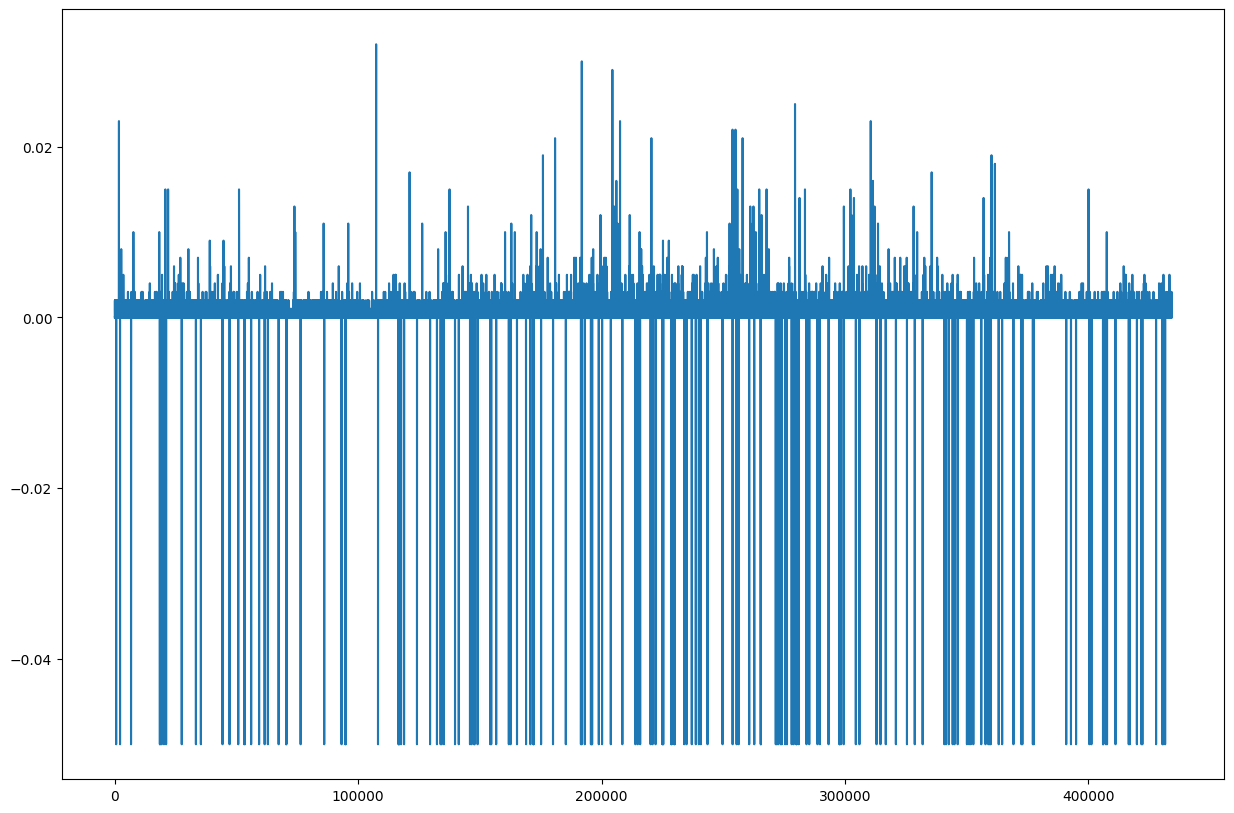

In [66]:
figure(figsize=(15, 10))
plt.plot(alb_logs_20230503_df['request_processing_time'])

In [67]:
np.max(alb_logs_20230503_df['target_processing_time'])

9.196

Replacing -1.0 with -6.0 for plotting purposes

In [68]:
alb_logs_20230503_df['target_processing_time'][alb_logs_20230503_df['target_processing_time'] == -1.0] = -6.0
alb_logs_20230503_df['target_processing_time'][alb_logs_20230503_df['target_processing_time'] == -6.0].head()

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1599/4026355583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_logs_20230503_df['target_processing_time'][alb_logs_20230503_df['target_processing_time'] == -1.0] = -6.0


557    -6.0
990    -6.0
1109   -6.0
2149   -6.0
2572   -6.0
Name: target_processing_time, dtype: float64

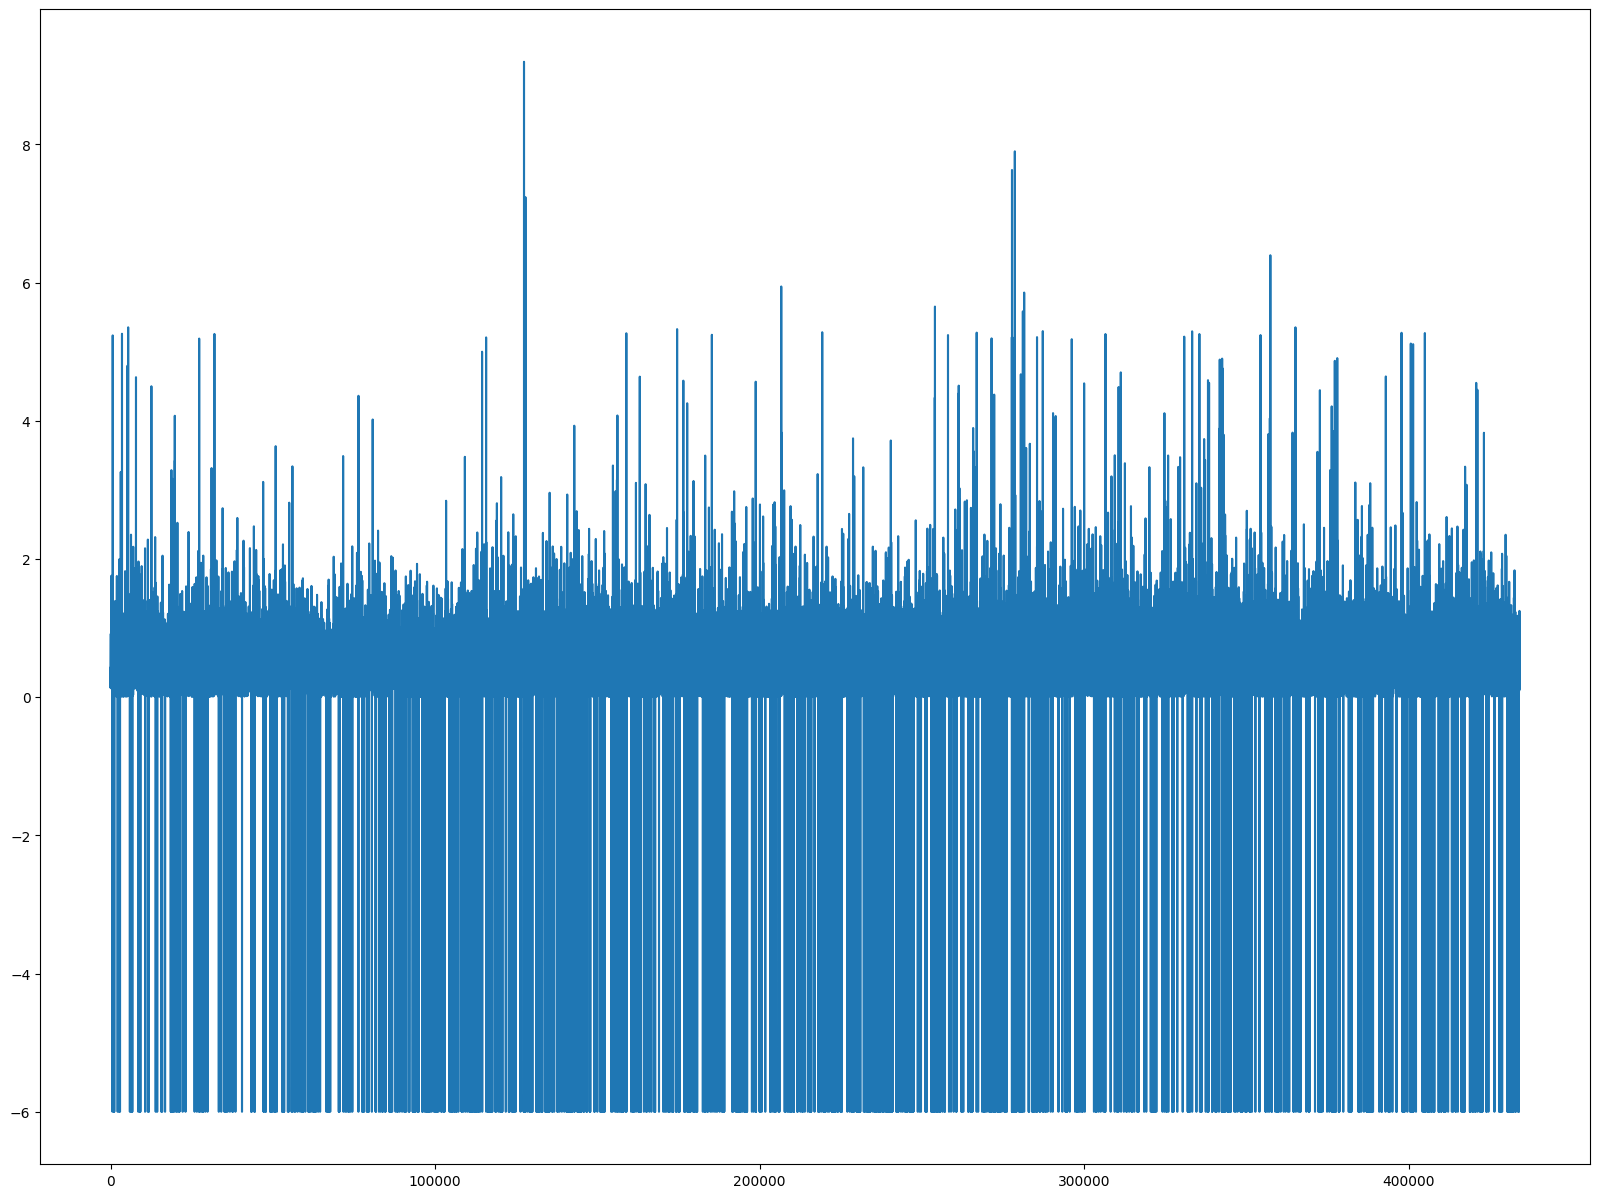

In [69]:
figure(figsize=(20, 15))
plt.plot(alb_logs_20230503_df['target_processing_time'])

No need for plotting time series values for columns request_processeing_time, target_processing_time, response_processing_time, received_bytes, sent_bytes and actions_executed for all log files as time series plots are hard to read.

There is no point in identifying anomalies by visually inspecting time series plots.

Anomaly detection will be done with simple statsitical method based on confidence intervals and with neural network

In [70]:
alb_logs_20230503_df['request_processing_time'][alb_logs_20230503_df['request_processing_time'] == -0.05] = -1.0

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1599/65249683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_logs_20230503_df['request_processing_time'][alb_logs_20230503_df['request_processing_time'] == -0.05] = -1.0


In [71]:
alb_logs_20230503_df['target_processing_time'][alb_logs_20230503_df['target_processing_time'] == -6.0] = -1.0

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1599/3204871457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alb_logs_20230503_df['target_processing_time'][alb_logs_20230503_df['target_processing_time'] == -6.0] = -1.0


# Concatenating dataframes

In [72]:
first_last_date_diference = []
first_last_date_diference.append(alb_logs_20230504_df.time[0] - alb_logs_20230503_df.time[alb_logs_20230503_df.shape[0] - 1])
first_last_date_diference.append(alb_logs_20230505_df.time[0] - alb_logs_20230504_df.time[alb_logs_20230504_df.shape[0] - 1])
first_last_date_diference.append(alb_logs_20230506_df.time[0] - alb_logs_20230505_df.time[alb_logs_20230505_df.shape[0] - 1])
first_last_date_diference.append(alb_logs_20230507_df.time[0] - alb_logs_20230506_df.time[alb_logs_20230506_df.shape[0] - 1])
first_last_date_diference.append(alb_logs_20230508_df.time[0] - alb_logs_20230507_df.time[alb_logs_20230507_df.shape[0] - 1])
first_last_date_diference.append(alb_logs_20230509_df.time[0] - alb_logs_20230508_df.time[alb_logs_20230508_df.shape[0] - 1])
first_last_date_diference

[Timedelta('0 days 00:02:15.327455'),
 Timedelta('0 days 00:02:38.271598'),
 Timedelta('0 days 00:00:01.438610'),
 Timedelta('0 days 00:01:46.233791'),
 Timedelta('0 days 00:02:55.147656'),
 Timedelta('0 days 00:02:56.877449')]

In [73]:
alb_logs_20230509_df.columns

Index(['type', 'time', 'elb', 'client_port', 'target_port',
       'request_processing_time', 'target_processing_time',
       'response_processing_time', 'elb_status_code', 'target_status_code',
       'received_bytes', 'sent_bytes', 'request', 'user_agent', 'ssl_cipher',
       'ssl_protocol', 'target_group_arn', 'trace_id', 'domain_name',
       'chosen_cert_arn', 'matched_rule_priority', 'request_creation_time',
       'actions_executed', 'redirect_url', 'error_reason', 'target_port_list',
       'target_status_code_list', 'classification'],
      dtype='object')

In [74]:
logs_df = pd.concat([alb_logs_20230504_df, alb_logs_20230505_df, alb_logs_20230506_df, alb_logs_20230507_df, alb_logs_20230508_df, alb_logs_20230509_df], axis=0)
logs_df.head()

,type,time,client_port,target_port,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,received_bytes,...,chosen_cert_arn,matched_rule_priority,request_creation_time,actions_executed,redirect_url,target_port_list,target_status_code_list,classification,elb,error_reason
0,h2,2023-05-03 23:55:00.936341,37.156.75.215:28412,107.110.171.34:60339,0.001,0.194,0.0,200,200,374,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:00.741000Z,forward,-,172.32.192.244:9090,200,NaN,NaN,NaN
1,h2,2023-05-03 23:55:00.980508,47.160.169.68:55292,107.110.171.34:60339,0.001,0.444,0.0,200,200,374,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:00.535000Z,forward,-,172.32.192.244:9090,200,NaN,NaN,NaN
2,h2,2023-05-03 23:55:01.031178,96.64.32.210:64670,107.110.171.34:60339,0.000,0.221,0.0,200,200,375,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:00.809000Z,forward,-,172.32.152.128:9090,200,NaN,NaN,NaN
3,h2,2023-05-03 23:55:01.230494,174.198.132.80:12554,107.110.171.34:60339,0.001,0.238,0.0,200,200,375,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:00.991000Z,forward,-,172.32.192.244:9090,200,NaN,NaN,NaN
4,h2,2023-05-03 23:55:01.504385,67.255.72.176:59368,107.110.171.34:60339,0.000,0.172,0.0,200,200,377,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-03T23:55:01.332000Z,forward,-,172.32.152.128:9090,200,NaN,NaN,NaN


In [75]:
# marking variables for deletion

del alb_logs_20230504_df
del alb_logs_20230505_df
del alb_logs_20230506_df
del alb_logs_20230507_df
del alb_logs_20230508_df
del alb_logs_20230509_df

In [76]:
logs_df.shape

(2577066, 28)

In [77]:
logs_df.columns

Index(['type', 'time', 'client_port', 'target_port', 'request_processing_time',
       'target_processing_time', 'response_processing_time', 'elb_status_code',
       'target_status_code', 'received_bytes', 'sent_bytes', 'request',
       'user_agent', 'ssl_cipher', 'ssl_protocol', 'target_group_arn',
       'trace_id', 'domain_name', 'chosen_cert_arn', 'matched_rule_priority',
       'request_creation_time', 'actions_executed', 'redirect_url',
       'target_port_list', 'target_status_code_list', 'classification', 'elb',
       'error_reason'],
      dtype='object')

In [78]:
logs_na_values = logs_df.isna().sum()
logs_na_values

type                              0
time                              0
client_port                       0
target_port                       0
request_processing_time           0
target_processing_time            0
response_processing_time          0
elb_status_code                   0
target_status_code                0
received_bytes                    0
sent_bytes                        0
request                           0
user_agent                        0
ssl_cipher                        0
ssl_protocol                      0
target_group_arn                  0
trace_id                          0
domain_name                       0
chosen_cert_arn                   0
matched_rule_priority             0
request_creation_time             0
actions_executed                  0
redirect_url                      0
target_port_list                  0
target_status_code_list           0
classification              1699427
elb                         2108138
error_reason                

In [79]:
logs_na_values["classification"] / logs_df.shape[0]

0.659442559872351

In [80]:
logs_na_values["elb"] / logs_df.shape[0]

0.8180380323980837

In [81]:
logs_na_values["error_reason"] / logs_df.shape[0]

0.8180380323980837

In [82]:
del logs_na_values

In [83]:
logs_df.classification

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
468923      -
468924      -
468925      -
468926      -
468927      -
Name: classification, Length: 2577066, dtype: object

In [84]:
np.unique(logs_df.classification[logs_df.classification.apply(lambda x: isinstance(x, str))], return_counts=True)

(array(['-', 'Ambiguous'], dtype=object), array([877638,      1]))

https://docs.aws.amazon.com/elasticloadbalancing/latest/application/load-balancer-access-logs.html

The classification for desync mitigation, enclosed in double quotes. If the request does not comply with RFC 7230, the possible values are Acceptable, Ambiguous, and Severe

If the request complies with RFC 7230, this value is set to -

https://docs.aws.amazon.com/elasticloadbalancing/latest/classic/config-desync-mitigation-mode.html

Desync mitigation mode protects your application from issues due to HTTP Desync. The load balancer classifies each request based on its threat level, allows safe requests, and then mitigates risk as specified by the mitigation mode that you specify. The desync mitigation modes are monitor, defensive, and strictest. The default is the defensive mode, which provides durable mitigation against HTTP desync while maintaining the availability of your application. **You can switch to strictest mode to ensure that your application receives only requests that comply with RFC 7230.**

**The http_desync_guardian library analyzes HTTP requests to prevent HTTP Desync attacks.**

In [85]:
possbile_threat_request = logs_df[logs_df.classification == "Ambiguous"].copy()
possbile_threat_request

,type,time,client_port,target_port,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,received_bytes,...,chosen_cert_arn,matched_rule_priority,request_creation_time,actions_executed,redirect_url,target_port_list,target_status_code_list,classification,elb,error_reason
312239,https,2023-05-05 17:43:01.476396,173.52.224.37:57129,190.21.190.209:62584,0.0,0.028,0.0,401,401,1190,...,arn:aws:acm:us-east-1:1337:certificate/12345678,1660,2023-05-05T17:43:01.430000Z,forward,-,172.32.128.80:9090,401,Ambiguous,NaN,NaN


We can drop column classification as variance = 0 for values that are not nan when we exclude value "Ambiguous"

In [86]:
logs_df.drop(['classification'], axis=1, inplace=True)

In [87]:
len(np.unique(logs_df.elb[logs_df.elb.apply(lambda x: isinstance(x, str))]))

1

We can drop column elb as variance = 0 for values that are not nan

In [88]:
logs_df.drop(['elb'], axis=1, inplace=True)

In [89]:
len(np.unique(logs_df.error_reason[logs_df.error_reason.apply(lambda x: isinstance(x, str))]))

1

We can drop column error_reason as variance = 0 for values that are not nan

In [90]:
logs_df.drop(['error_reason'], axis=1, inplace=True)

In [91]:
logs_df["client_port"]

0          37.156.75.215:28412
1          47.160.169.68:55292
2           96.64.32.210:64670
3         174.198.132.80:12554
4          67.255.72.176:59368
                  ...         
468923     173.88.44.230:56282
468924      166.196.54.5:31924
468925     45.17.161.151:65089
468926      172.58.107.48:6906
468927    172.56.153.107:35111
Name: client_port, Length: 2577066, dtype: object

Based on the meeting with the domain expert (mentor), we can drop the following columns:

1. client_port
2. target_port
3. ssl_protocol
4. trace_id
5. chosen_cert_arn
6. matched_rule_priority
7. target_port_list
8. target_status_code_list
9. request_creation_time

Based on the meeting with the domain expert (mentor), we should pay attention to the following columns:

1. user_agent
2. request

We should pay attention to the number of requests in a fixed time window

We should pay attention to the number of requests in the fixed time window and processing times --> anomaly if there is an extreme value for both variables or only one variable

There is a seasonality for the number of requests in a fixed time window

In [92]:
logs_df.drop(['client_port'], axis=1, inplace=True)
logs_df.drop(['target_port'], axis=1, inplace=True)
logs_df.drop(['ssl_protocol'], axis=1, inplace=True)
logs_df.drop(['trace_id'], axis=1, inplace=True)
logs_df.drop(['chosen_cert_arn'], axis=1, inplace=True)
logs_df.drop(['matched_rule_priority'], axis=1, inplace=True)
logs_df.drop(['target_port_list'], axis=1, inplace=True)
logs_df.drop(['target_status_code_list'], axis=1, inplace=True)
logs_df.drop(['request_creation_time'], axis=1, inplace=True)

https://docs.aws.amazon.com/elasticloadbalancing/latest/application/load-balancer-access-logs.html

The request line from the client, enclosed in double quotes and logged using the following format: HTTP method + protocol://host:port/uri + HTTP version. The load balancer preserves the URL sent by the client, as is, when recording the request URI. It does not set the content type for the access log file. When you process this field, consider how the client sent the URL.

Every row of the column request will be disassembled into the following parts for the purpose of reducing cardinality of the column:

1. HTTP method
2. protocol
3. host
4. port
5. uri
6. HTTP version

All parts will be held in a list. Two requests can be compared using the element-wise comparison of the items in the list.

In [93]:
def dissasemble_request(request):
    request_list = list()
    first_split = request.split(" ")
    second_split = first_split[1].split("/")
    third_split = second_split[2].split(":")
    request_list.append(first_split[0])
    request_list.append(second_split[0][0:len(second_split[0]) - 1])
    request_list.extend(third_split)
    for i in range(3, len(second_split)):
        second_split[i] = second_split[i] + str("/")
    request_list.extend(second_split[3:])
    request_list.append(first_split[2])
    return request_list

In [94]:
logs_df["request"] = logs_df["request"].apply(dissasemble_request)
logs_df["request"].head()

0    [GET, https, endpoint.secret.io, 443, v1/, use...
1    [GET, https, endpoint.secret.io, 443, v1/, use...
2    [GET, https, endpoint.secret.io, 443, v1/, use...
3    [GET, https, endpoint.secret.io, 443, v1/, use...
4    [GET, https, endpoint.secret.io, 443, v1/, use...
Name: request, dtype: object

In [95]:
logs_df["request"]

0         [GET, https, endpoint.secret.io, 443, v1/, use...
1         [GET, https, endpoint.secret.io, 443, v1/, use...
2         [GET, https, endpoint.secret.io, 443, v1/, use...
3         [GET, https, endpoint.secret.io, 443, v1/, use...
4         [GET, https, endpoint.secret.io, 443, v1/, use...
                                ...                        
468923    [GET, https, endpoint.secret.io, 443, v1/, use...
468924    [GET, https, endpoint.secret.io, 443, v1/, use...
468925    [GET, https, endpoint.secret.io, 443, v1/, use...
468926    [GET, https, endpoint.secret.io, 443, v1/, use...
468927    [GET, https, endpoint.secret.io, 443, v1/, use...
Name: request, Length: 2577066, dtype: object

# Reordering rows

In [96]:
logs_df["time"].diff()[1:]

1          0 days 00:00:00.044167
2          0 days 00:00:00.050670
3          0 days 00:00:00.199316
4          0 days 00:00:00.273891
5          0 days 00:00:00.437512
                   ...           
468923     0 days 00:00:01.767467
468924     0 days 00:00:00.148072
468925   -1 days +23:59:59.451073
468926     0 days 00:00:01.326179
468927   -1 days +23:59:59.919223
Name: time, Length: 2577065, dtype: timedelta64[ns]

In [97]:
differences = logs_df["time"].diff()[1:].apply(lambda x: x.days)
differences = differences[differences == -1]
differences.head()

10   -1
13   -1
20   -1
24   -1
29   -1
Name: time, dtype: int64

In [98]:
differences.shape[0]

456439

In [99]:
logs_df.sort_values(by=["time"], axis=0, inplace=True)
differences = logs_df["time"].diff()[1:].apply(lambda x: x.days)
print(len(differences[differences == -1]))

0


In [100]:
del differences

In [101]:
logs_df.reset_index(drop=True, inplace=True)
logs_df.head()

,type,time,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,received_bytes,sent_bytes,request,user_agent,ssl_cipher,target_group_arn,domain_name,actions_executed,redirect_url
0,h2,2023-05-03 23:55:00.847313,0.000,0.759,0.0,200,200,375,542,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,forward,-
1,h2,2023-05-03 23:55:00.936341,0.001,0.194,0.0,200,200,374,2363,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,forward,-
2,h2,2023-05-03 23:55:00.980508,0.001,0.444,0.0,200,200,374,542,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,forward,-
3,h2,2023-05-03 23:55:01.031178,0.000,0.221,0.0,200,200,375,5641,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,forward,-
4,h2,2023-05-03 23:55:01.052711,0.001,0.168,0.0,200,200,375,2532,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,forward,-


# Changing datatypes

In [102]:
logs_df.dtypes

type                                object
time                        datetime64[ns]
request_processing_time            float64
target_processing_time             float64
response_processing_time           float64
elb_status_code                      int64
target_status_code                  object
received_bytes                       int64
sent_bytes                           int64
request                             object
user_agent                          object
ssl_cipher                          object
target_group_arn                    object
domain_name                         object
actions_executed                    object
redirect_url                        object
dtype: object

In [103]:
logs_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 16 entries, type to redirect_url
dtypes: datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 2.1 GB


In [104]:
print(np.min(logs_df["request_processing_time"]))
print(np.max(logs_df["request_processing_time"]))


-1.0
1.012


In [105]:
print(np.min(logs_df["target_processing_time"]))
print(np.max(logs_df["target_processing_time"]))

-1.0
25.205


In [106]:
print(np.min(logs_df["response_processing_time"]))
print(np.max(logs_df["response_processing_time"]))

-1.0
0.011


In [107]:
logs_df = logs_df.astype({'request_processing_time': 'float16', 'target_processing_time': 'float16', 'response_processing_time': 'float16'}, copy=False)

In [108]:
print(np.min(logs_df["elb_status_code"]))
print(np.max(logs_df["elb_status_code"]))

200
504


In [109]:
print(np.min(logs_df["received_bytes"]))
print(np.max(logs_df["received_bytes"]))

37
1190


In [110]:
print(np.min(logs_df["sent_bytes"]))
print(np.max(logs_df["sent_bytes"]))

0
76727


In [111]:
logs_df = logs_df.astype({'elb_status_code': 'uint16', 'received_bytes': 'uint16', 'sent_bytes': 'uint16'}, copy=False)

In [112]:
logs_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 16 entries, type to redirect_url
dtypes: datetime64[ns](1), float16(3), object(9), uint16(3)
memory usage: 2.0 GB


# Encoding categorical features

In [113]:
non_encode_columns = ["time", "request_processing_time", "target_processing_time", "response_processing_time", "received_bytes", "sent_bytes"]

In [114]:
for column in logs_df.columns:
    if column not in non_encode_columns:
        print("{0} cardinality: {1}".format(column, len(np.unique(logs_df[column], return_counts=True)[0])))

type cardinality: 3
elb_status_code cardinality: 11
target_status_code cardinality: 8
request cardinality: 152270
user_agent cardinality: 445
ssl_cipher cardinality: 2
target_group_arn cardinality: 5
domain_name cardinality: 5
actions_executed cardinality: 3
redirect_url cardinality: 250


In [115]:
del non_encode_columns

In [116]:
http_method_list = [row[0] for row in logs_df["request"]]
protocol_list = [row[1] for row in logs_df["request"]]
host_list = [row[2] for row in logs_df["request"]]
port_list = [row[3] for row in logs_df["request"]]
uri_list = [row[4:len(row) - 1] for row in logs_df["request"]]
uri_list_joined = ["".join(uri) for uri in uri_list]
http_version_list = [row[len(row) - 1] for row in logs_df["request"]]

In [117]:
uri_list_joined[:5]

['v1/users/FCXR/tasks/',
 'v1/users/12QA/tasks/',
 'v1/users/L84F/tasks/',
 'v1/users/LFJV/tasks/',
 'v1/users/YAFL/tasks/']

In [118]:
np.unique(http_method_list, return_counts=True)

(array(['DELETE', 'GET', 'HEAD', 'PATCH', 'POST', 'PUT'], dtype='<U6'),
 array([      1, 2570294,       4,       3,    6682,      82]))

In [119]:
np.unique(protocol_list, return_counts=True)

(array(['http', 'https'], dtype='<U5'), array([    681, 2576385]))

In [120]:
np.unique(host_list, return_counts=True)

(array(['api-community.prod.wsli.dev', 'curriculum-api.nvteh.com',
        'data.nvteh.com', 'endpoint.secret.io'], dtype='<U27'),
 array([  20545,      11,       1, 2556509]))

In [121]:
np.unique(port_list, return_counts=True)

(array(['443', '80'], dtype='<U3'), array([2576391,     675]))

In [122]:
np.unique(uri_list_joined, return_counts=True)

(array(['/', '202110/images/public.css/', '6//', ..., 'yinjian//',
        'zz/address.php/', 'zz2/address.php/'], dtype='<U86'),
 array([903,   3,   1, ...,   1,   2,   1]))

In [123]:
len(np.unique(uri_list_joined, return_counts=True)[0])

151943

There are 151943 unique URIs

In [124]:
np.unique(http_version_list, return_counts=True)

(array(['HTTP/1.0', 'HTTP/1.1', 'HTTP/2.0'], dtype='<U8'),
 array([     57,    2296, 2574713]))

In [125]:
np.unique(logs_df["type"])

array(['h2', 'http', 'https'], dtype=object)

In [126]:
np.unique(logs_df["elb_status_code"])

array([200, 301, 400, 401, 404, 428, 460, 500, 502, 503, 504],
      dtype=uint16)

In [127]:
np.unique(logs_df["target_status_code"])

array(['-', '200', '400', '401', '404', '428', '500', '503'], dtype=object)

In [128]:
np.unique(logs_df["user_agent"])[:5]

array(['-',
       'Dalvik/2.1.0 (Linux; U; Android 9.0; ZTE BA520 Build/MRA58K)',
       'MightyUserAgent/10.43.0 (com.nvteh.wlc; build:42469; iOS 15.0.0) Alamofire/5.5.0',
       'MightyUserAgent/10.43.0 (com.nvteh.wlc; build:42469; iOS 15.6.1) Alamofire/5.5.0',
       'MightyUserAgent/10.43.0 (com.nvteh.wlc; build:42469; iOS 15.7.5) Alamofire/5.5.0'],
      dtype=object)

In [129]:
np.unique(logs_df["ssl_cipher"])

array(['-', 'ECDHE-RSA-AES128-GCM-SHA256'], dtype=object)

In [130]:
np.unique(logs_df["target_group_arn"])

array(['-',
       'arn:aws:elasticloadbalancing:us-east-1:1337:targetgroup/api-community-public/9349b0addfe28fdb',
       'arn:aws:elasticloadbalancing:us-east-1:1337:targetgroup/apiserver-public/f55f4196f03a046e',
       'arn:aws:elasticloadbalancing:us-east-1:1337:targetgroup/endpoint/adf298347223',
       'arn:aws:elasticloadbalancing:us-east-1:1337:targetgroup/nvteh-fargate-networking-drop-1/5f923337a2c8804f'],
      dtype=object)

In [131]:
np.unique(logs_df["domain_name"])

array(['-', 'api-community.prod.wsli.dev', 'curriculum-api.nvteh.com',
       'data.nvteh.com', 'endpoint.secret.io'], dtype=object)

In [132]:
np.unique(logs_df["actions_executed"])

array(['-', 'forward', 'redirect'], dtype=object)

In [133]:
np.unique(logs_df["redirect_url"])[:5]

array(['-', 'https://endpoint.secret.io:443/',
       'https://endpoint.secret.io:443/202110/images/public.css',
       'https://endpoint.secret.io:443/Api/Home/main',
       'https://endpoint.secret.io:443/Content/Wap/base.css'],
      dtype=object)

We will one hot encode all categorical features

In [134]:
from sklearn.preprocessing import OneHotEncoder

In [135]:
""" ohe = OneHotEncoder()

logs_df["request"] = logs_df["request"].apply(lambda x : "".join(x))

logs_df_object = logs_df.select_dtypes("object")
ohe.fit(logs_df_object)

codes = ohe.transform(logs_df_object).toarray()
feature_names = ohe.get_feature_names_out(["type", "target_status_code", "request", "user_agent", "ssl_cipher", "target_group_arn", "domain_name", "actions_executed", "redirect_url"])

logs_df_ohe = pd.concat([logs_df.select_dtypes(exclude='object'), pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1) """

' ohe = OneHotEncoder()\n\nlogs_df["request"] = logs_df["request"].apply(lambda x : "".join(x))\n\nlogs_df_object = logs_df.select_dtypes("object")\nohe.fit(logs_df_object)\n\ncodes = ohe.transform(logs_df_object).toarray()\nfeature_names = ohe.get_feature_names_out(["type", "target_status_code", "request", "user_agent", "ssl_cipher", "target_group_arn", "domain_name", "actions_executed", "redirect_url"])\n\nlogs_df_ohe = pd.concat([logs_df.select_dtypes(exclude=\'object\'), pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1) '

Kernel crashes

In [136]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["type"].values.reshape(-1, 1))
ohe_type = enc.transform(logs_df["type"].values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('ohe_elb_status_code.pkl', 'wb') as f:
    pickle.dump(ohe_elb_status_code, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('ohe_elb_status_code.pkl', 'wb') as f:\n    pickle.dump(ohe_elb_status_code, f) "

In [137]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["elb_status_code"].values.reshape(-1, 1))
ohe_elb_status_code = enc.transform(logs_df["elb_status_code"].values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('ohe_elb_status_code.pkl', 'wb') as f:
    pickle.dump(ohe_elb_status_code, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('ohe_elb_status_code.pkl', 'wb') as f:\n    pickle.dump(ohe_elb_status_code, f) "

In [138]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["target_status_code"].values.reshape(-1, 1))
ohe_target_status_code = enc.transform(logs_df["target_status_code"].values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('ohe_target_status_code.pkl', 'wb') as f:
    pickle.dump(ohe_target_status_code, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('ohe_target_status_code.pkl', 'wb') as f:\n    pickle.dump(ohe_target_status_code, f) "

In [139]:
# invoking garbage collection, del variables are marked for deletion

import gc

gc.collect()

0

In [140]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["request"].apply(lambda x : "".join(x)).values.reshape(-1, 1))
ohe_request = enc.transform(logs_df["request"].apply(lambda x : "".join(x)).values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('ohe_request.pkl', 'wb') as f:
    pickle.dump(ohe_request, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('ohe_request.pkl', 'wb') as f:\n    pickle.dump(ohe_request, f) "

In [141]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["user_agent"].values.reshape(-1, 1))
ohe_user_agent = enc.transform(logs_df["user_agent"].values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('user_agent.pkl', 'wb') as f:
    pickle.dump(ohe_user_agent, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('user_agent.pkl', 'wb') as f:\n    pickle.dump(ohe_user_agent, f) "

In [142]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["ssl_cipher"].values.reshape(-1, 1))
ohe_ssl_cipher = enc.transform(logs_df["ssl_cipher"].values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('ohe_ssl_cipher.pkl', 'wb') as f:
    pickle.dump(ohe_ssl_cipher, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('ohe_ssl_cipher.pkl', 'wb') as f:\n    pickle.dump(ohe_ssl_cipher, f) "

In [143]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["target_group_arn"].values.reshape(-1, 1))
ohe_target_group_arn = enc.transform(logs_df["target_group_arn"].values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('ohe_target_group_arn.pkl', 'wb') as f:
    pickle.dump(ohe_target_group_arn, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('ohe_target_group_arn.pkl', 'wb') as f:\n    pickle.dump(ohe_target_group_arn, f) "

In [144]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["domain_name"].values.reshape(-1, 1))
ohe_domain_name = enc.transform(logs_df["domain_name"].values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('ohe_domain_name.pkl', 'wb') as f:
    pickle.dump(ohe_domain_name, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('ohe_domain_name.pkl', 'wb') as f:\n    pickle.dump(ohe_domain_name, f) "

In [145]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["actions_executed"].values.reshape(-1, 1))
ohe_actions_executed = enc.transform(logs_df["actions_executed"].values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('ohe_actions_executed.pkl', 'wb') as f:
    pickle.dump(ohe_actions_executed, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('ohe_actions_executed.pkl', 'wb') as f:\n    pickle.dump(ohe_actions_executed, f) "

In [146]:
enc = OneHotEncoder(handle_unknown='ignore', dtype=np.int8)
enc.fit(logs_df["redirect_url"].values.reshape(-1, 1))
ohe_redirect_url = enc.transform(logs_df["redirect_url"].values.reshape(-1, 1)).toarray()

""" # saving variable to the file as kernel crashes when one hot encoding request variable
with open('ohe_redirect_url.pkl', 'wb') as f:
    pickle.dump(ohe_redirect_url, f) """

" # saving variable to the file as kernel crashes when one hot encoding request variable\nwith open('ohe_redirect_url.pkl', 'wb') as f:\n    pickle.dump(ohe_redirect_url, f) "

Column order is not important

In [147]:
# invoking garbage collection, del variables are marked for deletion

import gc

gc.collect()

0

In [148]:
pd.DataFrame(ohe_type).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 3 entries, 0 to 2
dtypes: int8(3)
memory usage: 7.4 MB


In [149]:
logs_df["time"].info(verbose=False, memory_usage="deep")

<class 'pandas.core.series.Series'>
RangeIndex: 2577066 entries, 0 to 2577065
dtypes: datetime64[ns](1)
memory usage: 19.7 MB


In [150]:
logs_df["request_processing_time"].info(verbose=False, memory_usage="deep")

<class 'pandas.core.series.Series'>
RangeIndex: 2577066 entries, 0 to 2577065
dtypes: float16(1)
memory usage: 4.9 MB


In [151]:
logs_df["target_processing_time"].info(verbose=False, memory_usage="deep")

<class 'pandas.core.series.Series'>
RangeIndex: 2577066 entries, 0 to 2577065
dtypes: float16(1)
memory usage: 4.9 MB


In [152]:
logs_df["response_processing_time"].info(verbose=False, memory_usage="deep")

<class 'pandas.core.series.Series'>
RangeIndex: 2577066 entries, 0 to 2577065
dtypes: float16(1)
memory usage: 4.9 MB


In [153]:
pd.DataFrame(ohe_elb_status_code).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 11 entries, 0 to 10
dtypes: int8(11)
memory usage: 27.0 MB


In [154]:
pd.DataFrame(ohe_target_status_code).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 8 entries, 0 to 7
dtypes: int8(8)
memory usage: 19.7 MB


In [155]:
logs_df["received_bytes"].info(verbose=False, memory_usage="deep")

<class 'pandas.core.series.Series'>
RangeIndex: 2577066 entries, 0 to 2577065
dtypes: uint16(1)
memory usage: 4.9 MB


In [156]:
logs_df["sent_bytes"].info(verbose=False, memory_usage="deep")

<class 'pandas.core.series.Series'>
RangeIndex: 2577066 entries, 0 to 2577065
dtypes: uint16(1)
memory usage: 4.9 MB


In [157]:
logs_df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 16 entries, type to redirect_url
dtypes: datetime64[ns](1), float16(3), object(9), uint16(3)
memory usage: 2.0 GB


In [158]:
pd.DataFrame(ohe_request).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 152270 entries, 0 to 152269
dtypes: int8(152270)
memory usage: 365.5 GB


This dataframe is too big for available RAM

We will not use the one hot encoded feature request for statistical model as existing embedding matrices solutions are available as embedding layers. There is a difficulty applying embedding matrices without modules for building neural networks.

Instead of that feature we will use the feature number of requests in one unit of time.

In [159]:
logs_df["time"].diff()[1:].head()

1   0 days 00:00:00.089028
2   0 days 00:00:00.044167
3   0 days 00:00:00.050670
4   0 days 00:00:00.021533
5   0 days 00:00:00.064132
Name: time, dtype: timedelta64[ns]

In [160]:
np.mean(logs_df["time"].diff()[1:].values)

numpy.timedelta64(201158997,'ns')

In [161]:
import datetime as dt
epoch = dt.datetime.utcfromtimestamp(0)
converted_series = logs_df["time"].apply(lambda x: (x - epoch).total_seconds() * 1000.0)
converted_series.head()

0    1.683158e+12
1    1.683158e+12
2    1.683158e+12
3    1.683158e+12
4    1.683158e+12
Name: time, dtype: float64

In [162]:
time_diff = converted_series.diff()[1:].values
mean_val = np.mean(time_diff)
first_date = converted_series.iloc[0]

In [163]:
num_of_requests_time_window = [np.sum((converted_series.to_numpy() < first_date + i * mean_val)) for i in tqdm(range(logs_df.shape[0]))]
num_of_requests_time_window[:5]

  0%|          | 0/2577066 [00:00<?, ?it/s]

100%|██████████| 2577066/2577066 [36:08<00:00, 1188.29it/s]


[0, 4, 7, 7, 8]

In [171]:
num_of_requests_time_window[0] = num_of_requests_time_window[0] + 1
num_of_requests_time_window[:5]

[1, 4, 7, 7, 8]

In [ ]:
pd.DataFrame(ohe_user_agent).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 445 entries, 0 to 444
dtypes: int8(445)
memory usage: 1.1 GB


In [ ]:
pd.DataFrame(ohe_ssl_cipher).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 2 entries, 0 to 1
dtypes: int8(2)
memory usage: 4.9 MB


In [ ]:
pd.DataFrame(ohe_target_group_arn).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 5 entries, 0 to 4
dtypes: int8(5)
memory usage: 12.3 MB


In [ ]:
pd.DataFrame(ohe_domain_name).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 5 entries, 0 to 4
dtypes: int8(5)
memory usage: 12.3 MB


In [ ]:
pd.DataFrame(ohe_actions_executed).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 3 entries, 0 to 2
dtypes: int8(3)
memory usage: 7.4 MB


In [ ]:
pd.DataFrame(ohe_redirect_url).info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577066 entries, 0 to 2577065
Columns: 250 entries, 0 to 249
dtypes: int8(250)
memory usage: 614.4 MB


In [ ]:
ohe_type_columns = list()
for i in range(len(ohe_type[0])):
    ohe_type_columns.append("ohe_type" + str(i))

In [ ]:
ohe_elb_status_code_columns = list()
for i in range(len(ohe_elb_status_code[0])):
    ohe_elb_status_code_columns.append("ohe_elb_status_code" + str(i))

In [ ]:
ohe_target_status_code_columns = list()
for i in range(len(ohe_target_status_code[0])):
    ohe_target_status_code_columns.append("ohe_target_status_code" + str(i))

In [ ]:
ohe_user_agent_columns = list()
for i in range(len(ohe_user_agent[0])):
    ohe_user_agent_columns.append("ohe_user_agent" + str(i))

In [ ]:
ohe_ssl_cipher_columns = list()
for i in range(len(ohe_ssl_cipher[0])):
    ohe_ssl_cipher_columns.append("ohe_ssl_cipher" + str(i))

In [ ]:
ohe_target_group_arn_columns = list()
for i in range(len(ohe_target_group_arn[0])):
    ohe_target_group_arn_columns.append("ohe_target_group_arn" + str(i))

In [ ]:
ohe_domain_name_columns = list()
for i in range(len(ohe_domain_name[0])):
    ohe_domain_name_columns.append("ohe_domain_name" + str(i))

In [ ]:
ohe_actions_executed_columns = list()
for i in range(len(ohe_actions_executed[0])):
    ohe_actions_executed_columns.append("ohe_actions_executed" + str(i))

In [ ]:
ohe_redirect_url_columns = list()
for i in range(len(ohe_redirect_url[0])):
    ohe_redirect_url_columns.append("ohe_redirect_url" + str(i))

In [ ]:
ohe_logs_df = pd.concat([pd.DataFrame(ohe_type, columns=ohe_type_columns), logs_df["time"], logs_df["request_processing_time"], logs_df["target_processing_time"], logs_df["response_processing_time"], pd.DataFrame(ohe_elb_status_code, columns=ohe_elb_status_code_columns), pd.DataFrame(ohe_target_status_code, columns=ohe_target_status_code_columns), logs_df["received_bytes"], logs_df["sent_bytes"], pd.DataFrame(ohe_user_agent, columns=ohe_user_agent_columns), pd.DataFrame(ohe_ssl_cipher, columns=ohe_ssl_cipher_columns), pd.DataFrame(ohe_target_group_arn, columns=ohe_target_group_arn_columns), pd.DataFrame(ohe_domain_name, columns=ohe_domain_name_columns), pd.DataFrame(ohe_actions_executed, columns=ohe_actions_executed_columns), pd.DataFrame(ohe_redirect_url, columns=ohe_redirect_url_columns)], axis=1, copy=False)
ohe_logs_df.head()

,ohe_type0,ohe_type1,ohe_type2,time,request_processing_time,target_processing_time,response_processing_time,ohe_elb_status_code0,ohe_elb_status_code1,ohe_elb_status_code2,...,ohe_redirect_url240,ohe_redirect_url241,ohe_redirect_url242,ohe_redirect_url243,ohe_redirect_url244,ohe_redirect_url245,ohe_redirect_url246,ohe_redirect_url247,ohe_redirect_url248,ohe_redirect_url249
0,1,0,0,2023-05-03 23:55:00.847313,0.000,0.758789,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,2023-05-03 23:55:00.936341,0.001,0.193970,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2023-05-03 23:55:00.980508,0.001,0.444092,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,2023-05-03 23:55:01.031178,0.000,0.220947,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2023-05-03 23:55:01.052711,0.001,0.167969,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ohe_logs_df.shape

(2577066, 738)

In [ ]:
ohe_logs_df.to_csv("ohe_logs_df.csv")

In [166]:
logs_df[["request_processing_time", "target_processing_time", "response_processing_time", "received_bytes", "sent_bytes"]]

,request_processing_time,target_processing_time,response_processing_time,received_bytes,sent_bytes
0,0.000,0.758789,0.0,375,542
1,0.001,0.193970,0.0,374,2363
2,0.001,0.444092,0.0,374,542
3,0.000,0.220947,0.0,375,5641
4,0.001,0.167969,0.0,375,2532
...,...,...,...,...,...
2577061,0.001,0.189941,0.0,231,543
2577062,0.001,0.189941,0.0,375,4557
2577063,0.000,0.192993,0.0,232,542
2577064,0.000,0.260010,0.0,333,9846


In [174]:
pd.concat(objs=[logs_df[["request_processing_time", "target_processing_time", "response_processing_time", "received_bytes", "sent_bytes"]], pd.DataFrame(num_of_requests_time_window, columns=["number of requests"])], axis=1).to_csv("logs_df_statistical_method.csv")

# Statistical model for anomaly detection

For statistical method we will use the leverage statistic.

The threshold is the following:

* if atleast one predictor value has extreme value then we classify observation as unusual

The mentioned can help unveil anomalies caused by the following scenario:

* we should pay attention to the number of requests in the fixed time window and processing times

* anomaly if there is an extreme value for both variables or for only one variable

We will computer the leverage statistic:

1. For multidimensional vectors as in multidimensional setting it is possible to have an observation that is well within the range of each individual predictor’s values, but that is unusual in terms of the full set of predictors --> no predictor has extreme value, but the observation is unusual when all predictor's values are taken into account

2. For unidimensional vectors as if one predictor's value of the observation has extreme value then we classify observation as unusual --> it is possible to have an observation that is well within the range of each individual predictor’s values except for one predictor as in multidimensional settting we need to summarize leverage statistics for all predictors (summary statistics)


This method will try to uncover high leverage points that have high leverage because of:

1. values of all predictors
2. single predictor value

The leverage statistic hi is always between 1/n and 1, and the average leverage for all the observations is always equal to (p + 1)/n. So if a given observation has a leverage statistic that greatly exceeds (p+1)/n, then we may suspect that the corresponding point has high leverage.

Leverage statistic values will be interpreted based on https://online.stat.psu.edu/stat501/lesson/11/11.2 and https://stats.stackexchange.com/questions/112777/leverage-influential-points

## Unidimensional case (p = 1)

In [ ]:
from tqdm import tqdm

In [ ]:
def statistical_method_unidimensional_case():
    anomalies_features_indices = dict()
    for column in ohe_logs_df.columns:
        for i in tqdm(range(1, ohe_logs_df.shape[0])):
            if (1/i + (ohe_logs_df[column][i] - np.mean(ohe_logs_df[column][:i + 1])) / np.var(ohe_logs_df[column][:i + 1])) > 2/i:
                anomalies_features_indices.update({str(i) + column: i})

Code needs to be executed in a parallel fashion.

In [ ]:
import os
os.cpu_count()

10

In [ ]:
ohe_logs_df.shape[1]

738

In [ ]:
ohe_logs_df.shape[1] // 10

73

Every core will receive 73 columns except the last one that will receive 73 + 8 columns

# Probabilistic model for anomaly detection

https://otexts.com/fpp3/stationarity.html

https://otexts.com/fpp3/backshift.html

https://otexts.com/fpp3/AR.html

https://otexts.com/fpp3/MA.html

https://otexts.com/fpp3/non-seasonal-arima.html

https://otexts.com/fpp3/arima-estimation.html

https://otexts.com/fpp3/seasonal-arima.html

## ACF plot

https://stats.stackexchange.com/questions/77248/what-is-autocorrelation-function

In [ ]:
""" from statsmodels.graphics.tsaplots import plot_acf
plot_acf(logs_df.request_processing_time, title="Autocorrelation request_processing_time")
plot_acf(logs_df.target_processing_time, title="Autocorrelation target_processing_time")
plot_acf(logs_df.response_processing_time, title="Autocorrelation response_processing_time")
plot_acf(logs_df.received_bytes, title="Autocorrelation received_bytes")
plot_acf(logs_df.sent_bytes, title="Autocorrelation sent_bytes") """

' from statsmodels.graphics.tsaplots import plot_acf\nplot_acf(logs_df.request_processing_time, title="Autocorrelation request_processing_time")\nplot_acf(logs_df.target_processing_time, title="Autocorrelation target_processing_time")\nplot_acf(logs_df.response_processing_time, title="Autocorrelation response_processing_time")\nplot_acf(logs_df.received_bytes, title="Autocorrelation received_bytes")\nplot_acf(logs_df.sent_bytes, title="Autocorrelation sent_bytes") '

plot_acf takes too long to computer values and to plot

## Unit root tests

https://otexts.com/fpp3/stationarity.html#unit-root-tests

We will use statistical hypothesis test to determine if differencing is required, to determine if data is stationary.

### KPSS test

https://www.youtube.com/watch?v=ZPtVV-a0pks

We will use KPSS test (H0: stationary) as we do not want to difference unless we have strong evidence of rejecting H0, unless we have strong evidence of non-stationarity

For ADF test, we will not difference unless we have strong evidence of rejecting H0 (H0: non-stationary), unless we have strong evidence of stationarity.

Therefore, it is better to difference already stationary time series and time series that are not stationarity then to not difference already stationary time series and time series that are not stationary as differencing is not an expensive computational operation.

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
non_encode_columns

NameError: name 'non_encode_columns' is not defined

In [ ]:
kpss(logs_df.request_processing_time)

(0.5058060168578655,
 0.04035900521219245,
 865,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

p-value is smaller than 0.05

It is unlikely to see such an extreme value of test statistic under the assumptuon that H0 is true

At the significance level of 0.05 we can reject H0 and conclude that time series is non-stationary

In [ ]:
kpss(logs_df.target_processing_time)

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1056/3274900074.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(logs_df.target_processing_time)


(12.22441150093667,
 0.01,
 836,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The actual p-value is smaller than the p-value returned --> p-value is smaller than 0.01

It is unlikely to see such an extreme value of test statistic under the assumption that H0 is true

At the significance level of 0.05 we can reject H0 and conclude that time series is non-stationary

In [ ]:
kpss(logs_df.response_processing_time)

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1056/1375394382.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(logs_df.response_processing_time)


(2.545828255488808,
 0.01,
 874,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The actual p-value is smaller than the p-value returned --> p-value is smaller than 0.01

It is unlikely to see such an extreme value of test statistic under the assumption that H0 is true

At the significance level of 0.05 we can reject H0 and conclude that time series is non-stationary

In [ ]:
kpss(logs_df.received_bytes)

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1056/2685193260.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(logs_df.received_bytes)


(2.6950924537629395,
 0.01,
 673,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The actual p-value is smaller than the p-value returned --> p-value is smaller than 0.01

It is unlikely to see such an extreme value of test statistic under the assumption that H0 is true

At the significance level of 0.05 we can reject H0 and conclude that time series is non-stationary

In [ ]:
kpss(logs_df.sent_bytes)

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1056/1747336929.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(logs_df.sent_bytes)


(2.492012549609109,
 0.01,
 689,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The actual p-value is smaller than the p-value returned --> p-value is smaller than 0.01

It is unlikely to see such an extreme value of test statistic under the assumption that H0 is true

At the significance level of 0.05 we can reject H0 and conclude that time series is non-stationary

## Differencing

In [ ]:
request_processing_time_differenced = logs_df.request_processing_time.diff()[1:]
kpss(request_processing_time_differenced)

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1056/3404550323.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(request_processing_time_differenced)


(0.0008672236387124501,
 0.1,
 4469,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The actual p-value is greater than the p-value returned. --> p-value is greater than 0.1

At the significance level of 0.05 we can not reject H0. We can conclude that time series is stationary.

In [ ]:
target_processing_time_differenced = logs_df.target_processing_time.diff()[1:]
kpss(target_processing_time_differenced)

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1056/2088291174.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(target_processing_time_differenced)


(0.00230905730644451,
 0.1,
 3936,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The actual p-value is greater than the p-value returned. --> p-value is greater than 0.1

At the significance level of 0.05 we can not reject H0. We can conclude that time series is stationary.

In [ ]:
response_processing_time_differenced = logs_df.response_processing_time.diff()[1:]
kpss(response_processing_time_differenced)

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1056/3299289381.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(response_processing_time_differenced)


(0.0025451896047367275,
 0.1,
 6443,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The actual p-value is greater than the p-value returned. --> p-value is greater than 0.1

At the significance level of 0.05 we can not reject H0. We can conclude that time series is stationary.

In [ ]:
received_bytes_differenced = logs_df.received_bytes.diff()[1:]
kpss(received_bytes_differenced)

(0.6038394027510677,
 0.022287327022630202,
 167,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The actual p-value is greater than the p-value returned. --> p-value is greater than 0.1

At the significance level of 0.05 we can not reject H0. We can conclude that time series is stationary.

In [ ]:
sent_bytes_differenced = logs_df.sent_bytes.diff()[1:]
kpss(sent_bytes_differenced)

/var/folders/bx/p1dzn6l159n6mrzq69ybb3340000gn/T/ipykernel_1056/2906885728.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(sent_bytes_differenced)


(4.766011945222432,
 0.01,
 576,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

The actual p-value is greater than the p-value returned. --> p-value is greater than 0.1

At the significance level of 0.05 we can not reject H0. We can conclude that time series is stationary.

## Test for heteroscedasticity

Available RAM is consumed when we use the White Breusch-Pagan statistical test and machine crashes

KPSS test confirmed for every time series that time series is stationary. We will visually inspect time series and decide if transformation is needed for the stabilization of variance becasue of type 1 error.


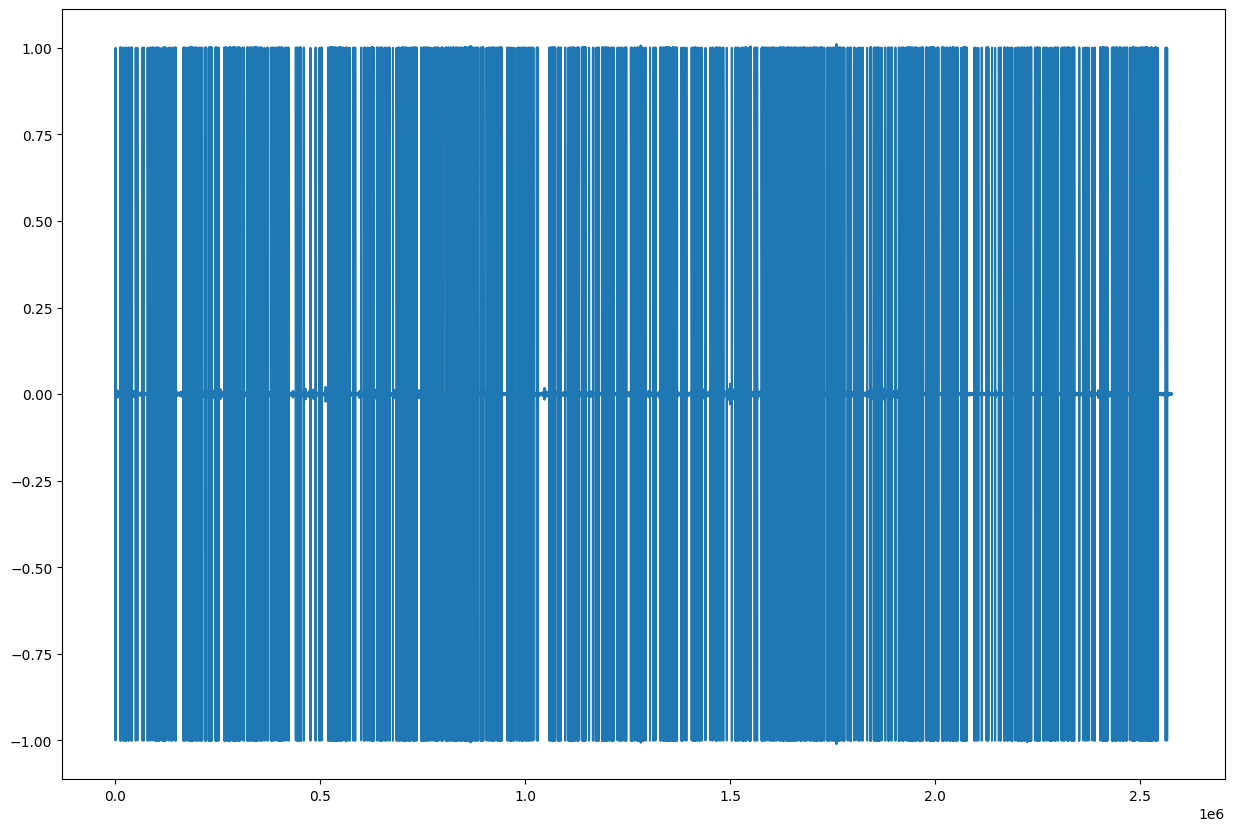

In [ ]:
figure(figsize=(15, 10))
plt.plot(request_processing_time_differenced)

Time series is homoscedastic

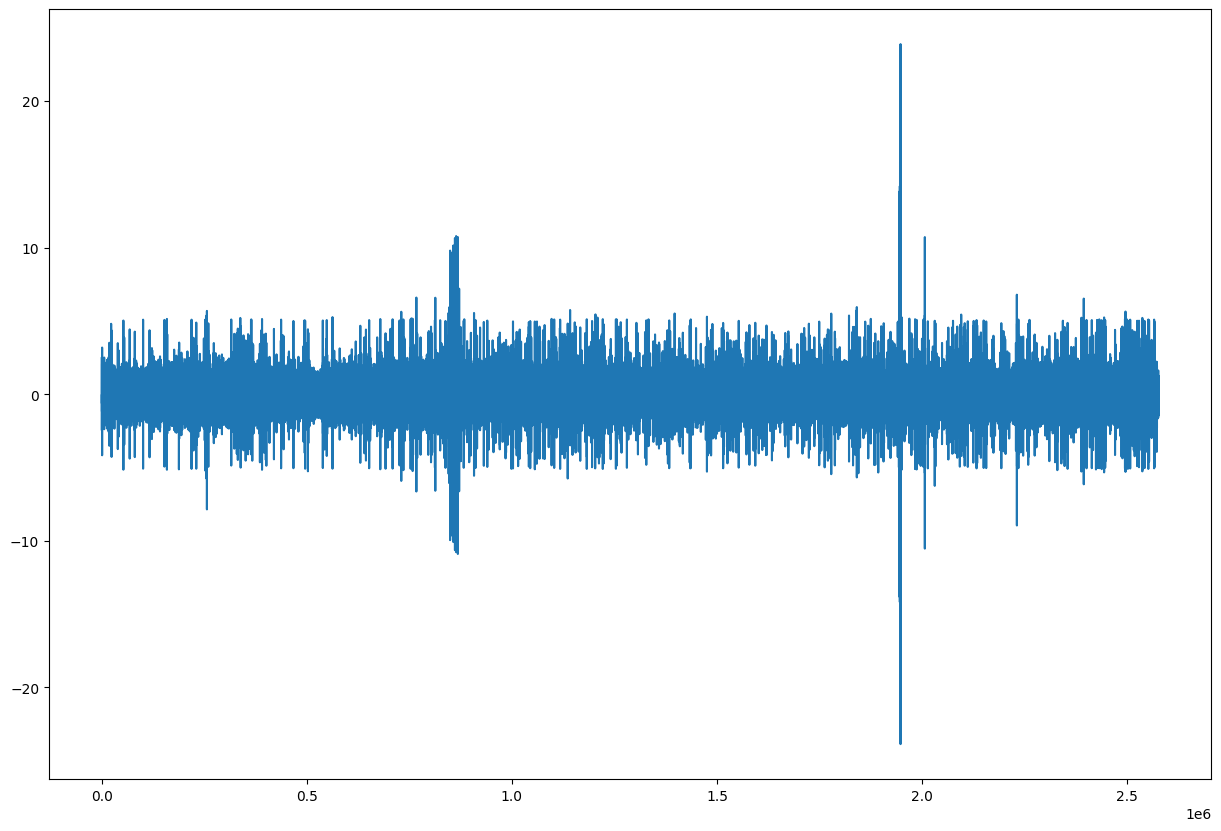

In [ ]:
figure(figsize=(15, 10))
plt.plot(target_processing_time_differenced)

Time series is homoscedastic

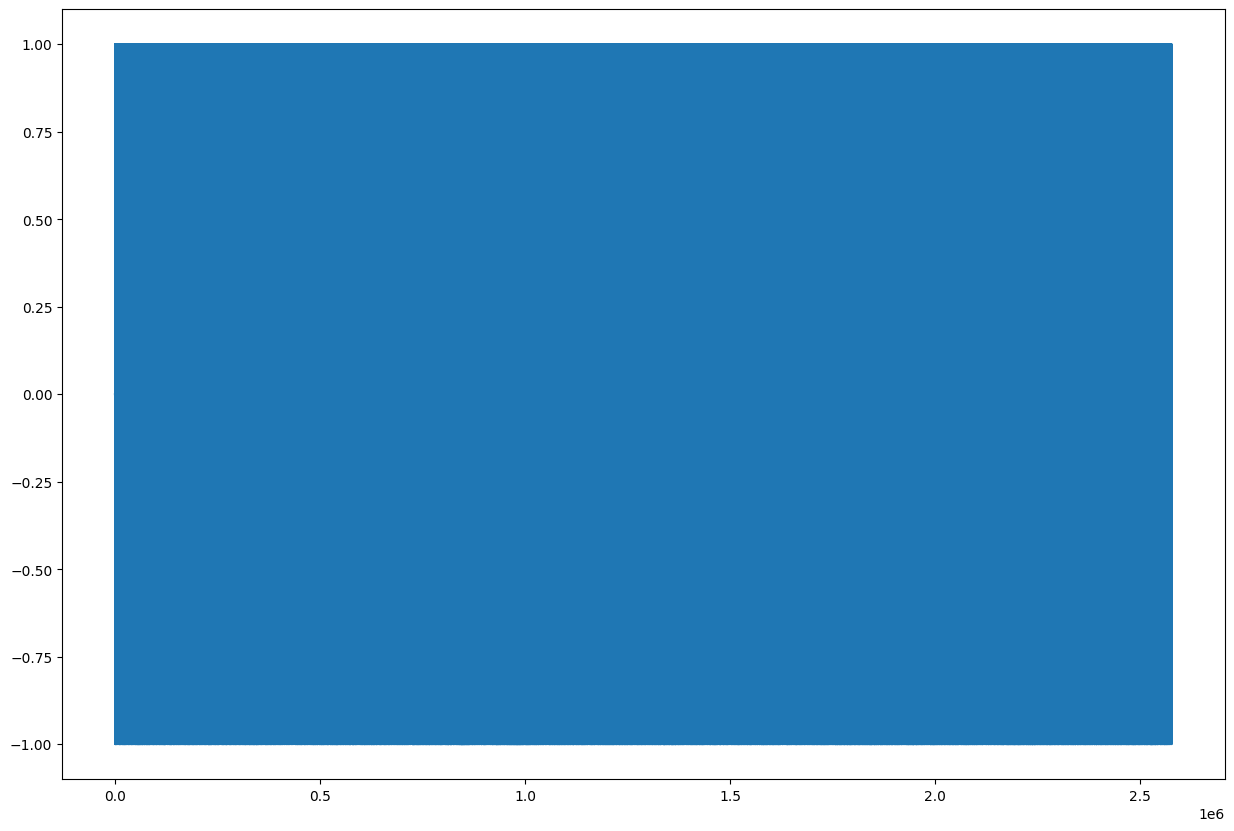

In [ ]:
figure(figsize=(15, 10))
plt.plot(response_processing_time_differenced)

Time series is homoscedastic

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

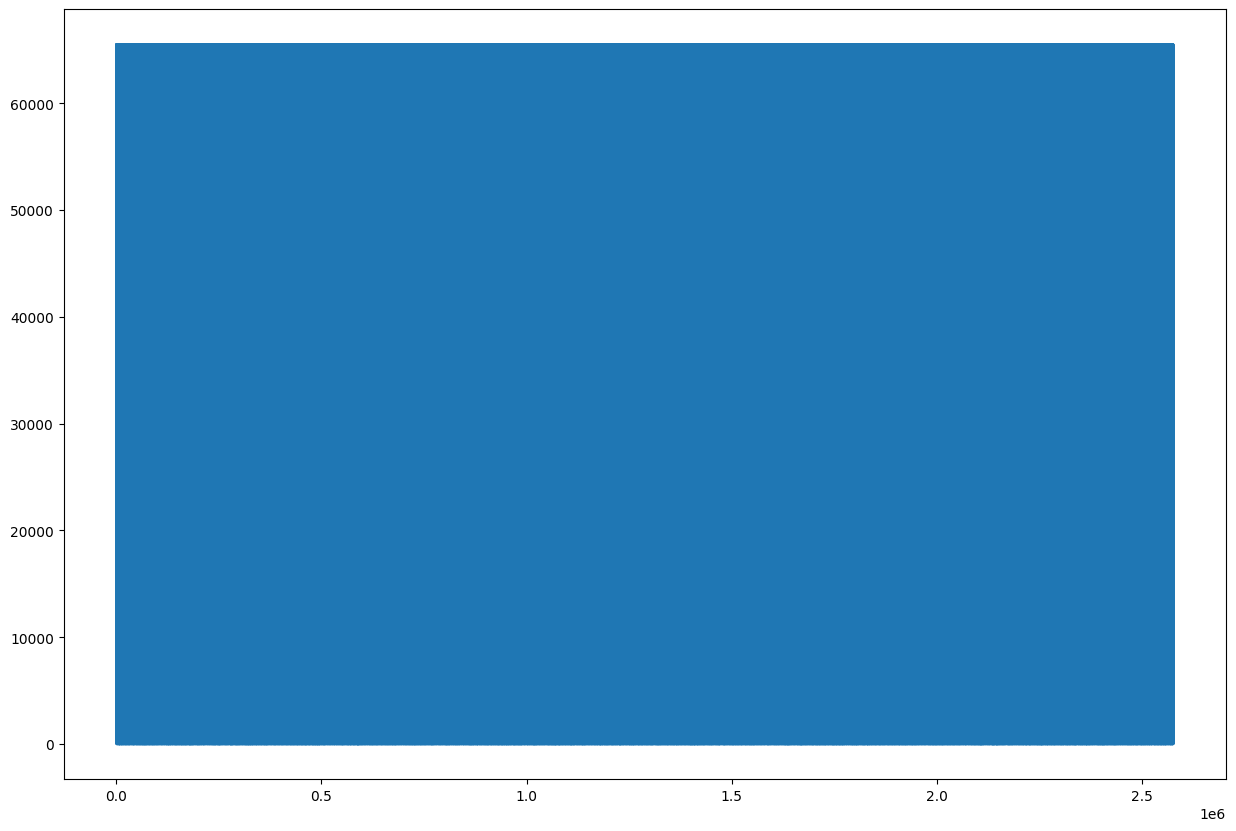

In [ ]:
figure(figsize=(15, 10))
plt.plot(received_bytes_differenced)

Time series is homoscedastic

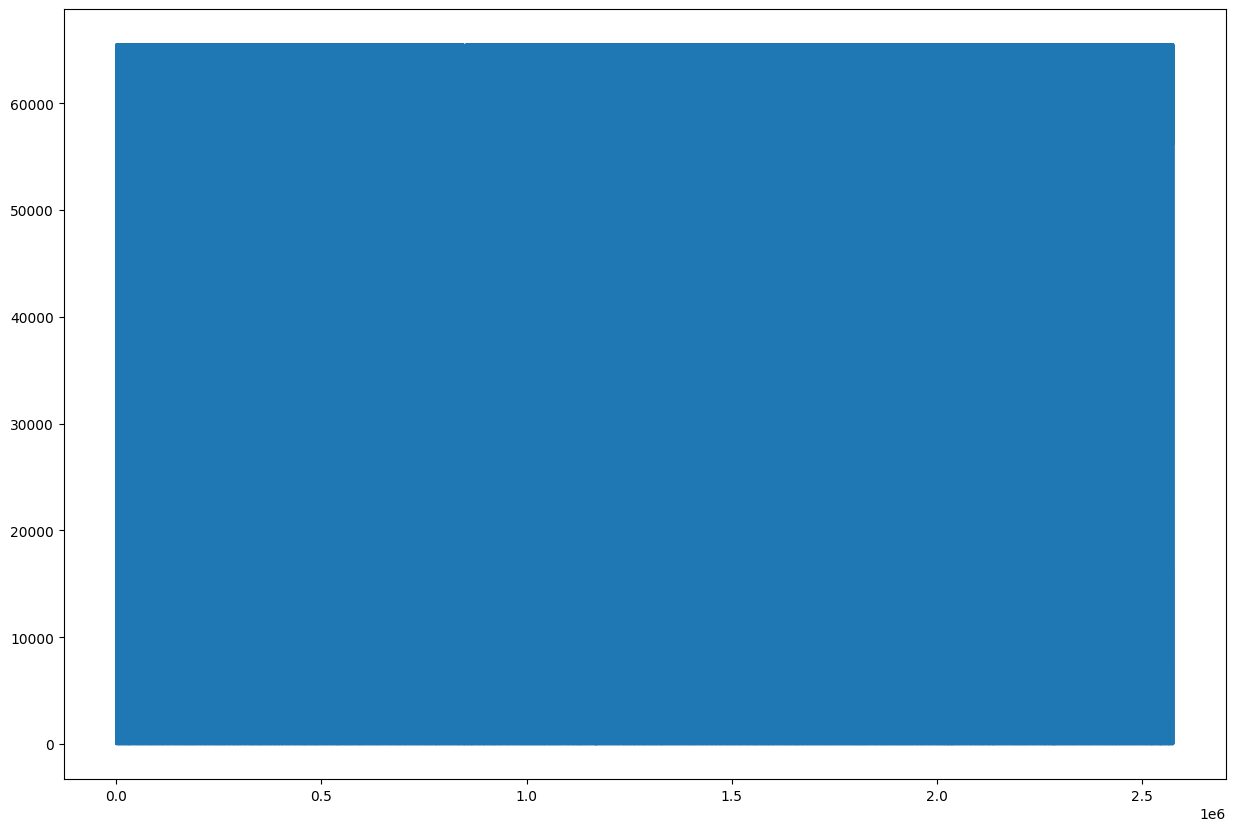

In [ ]:
figure(figsize=(15, 10))
plt.plot(sent_bytes_differenced)

Time series is homoscedastic

## Building and training the model

Model will be trained in R as R has an automatic procedure for finding the best possible coefficient for an ARIMA model based on the data

Screenshots of output of the procedure will be attached here

Following steps will be used

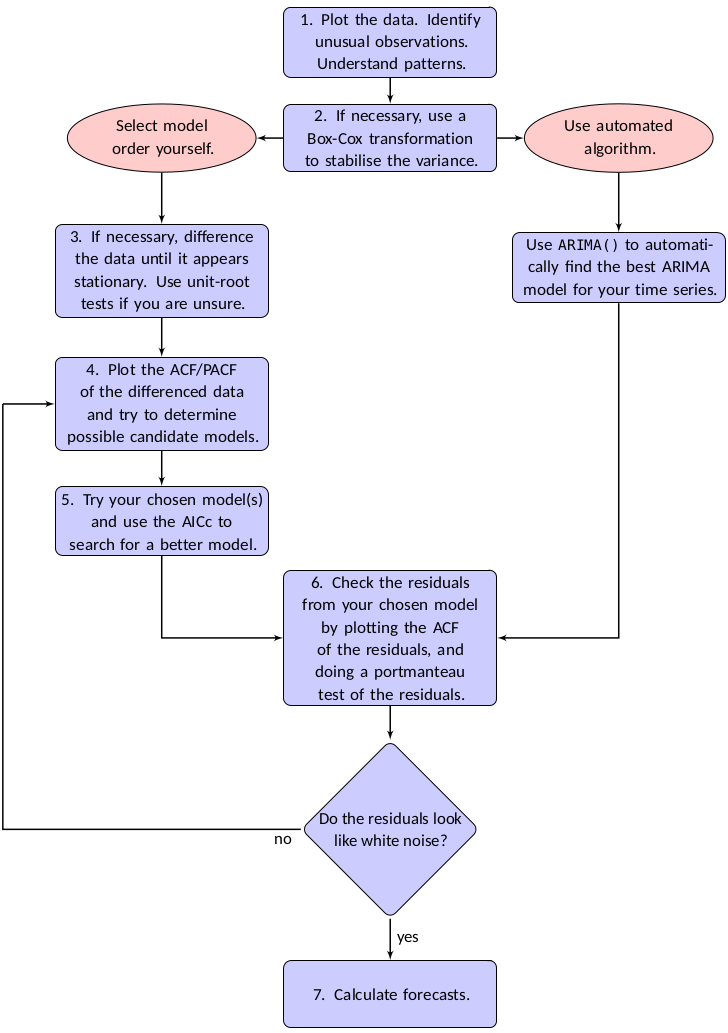

https://otexts.com/fpp3/arima-r.html

When fitting an ARIMA model to a set of (non-seasonal) time series data, the following procedure provides a useful general approach.

1. Plot the data and identify any unusual observations.

2. If necessary, transform the data (using a Box-Cox transformation) to stabilise the variance.

3. If the data are non-stationary, take first differences of the data until the data are stationary.

4. Examine the ACF/PACF: Is an ARIMA(p, d, 0) or ARIMA(0, d, q) model appropriate?

5. Try your chosen model(s), and use the AICc to search for a better model.

6. Check the residuals from your chosen model by plotting the ACF of the residuals, and doing a portmanteau test of the residuals. If they do not look like white noise, try a modified model.

7. Once the residuals look like white noise, calculate forecasts.

The Hyndman-Khandakar algorithm only takes care of steps 3-5. So even if you use it, you will still need to take care of the other steps yourself.

### 1.

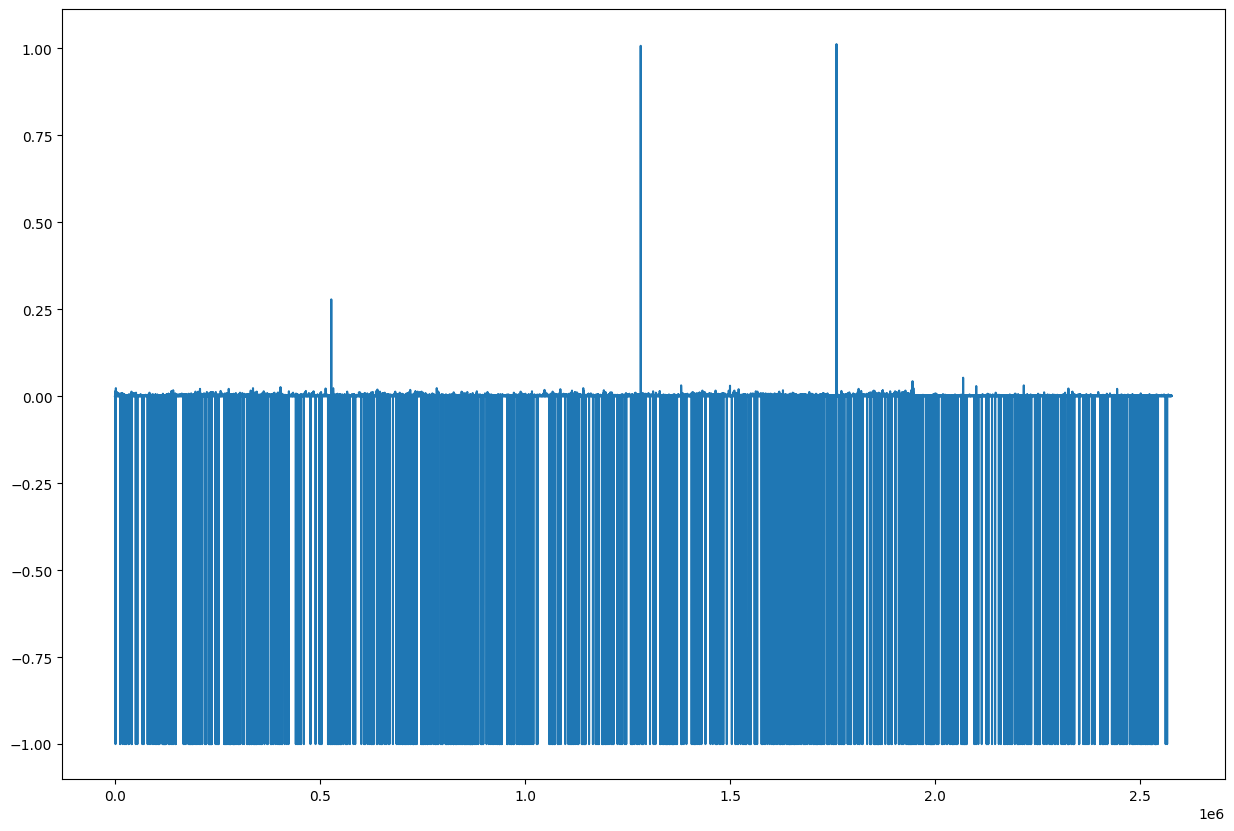

In [ ]:
figure(figsize=(15, 10))
plt.plot(logs_df["request_processing_time"])

Based on the KPSS test, time series is non-stationary.

Based on the plot, time series is homoscedastic.

3 spikes above 0 can be identified as anomalies

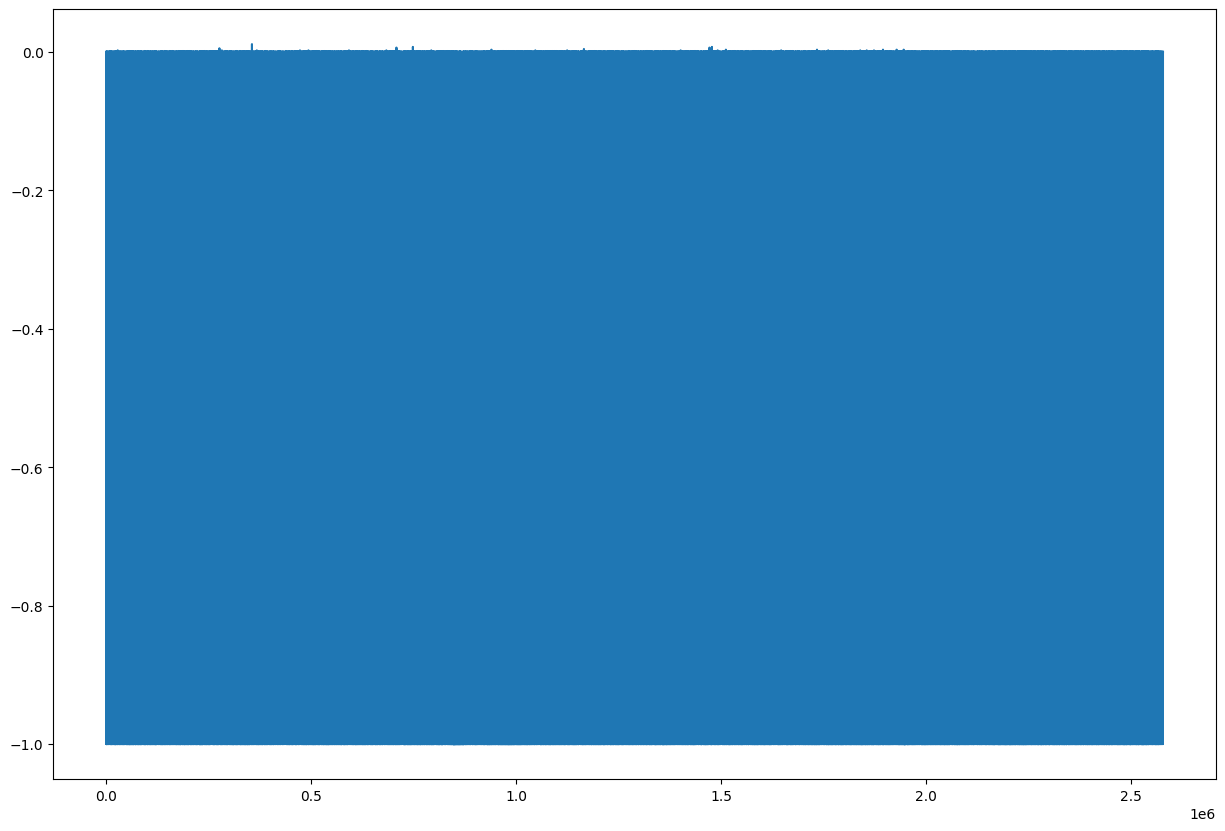

In [ ]:
figure(figsize=(15, 10))
plt.plot(logs_df["response_processing_time"])

Based on the KPSS test, time series is non-stationary.

Based on the plot, time series is homoscedastic.

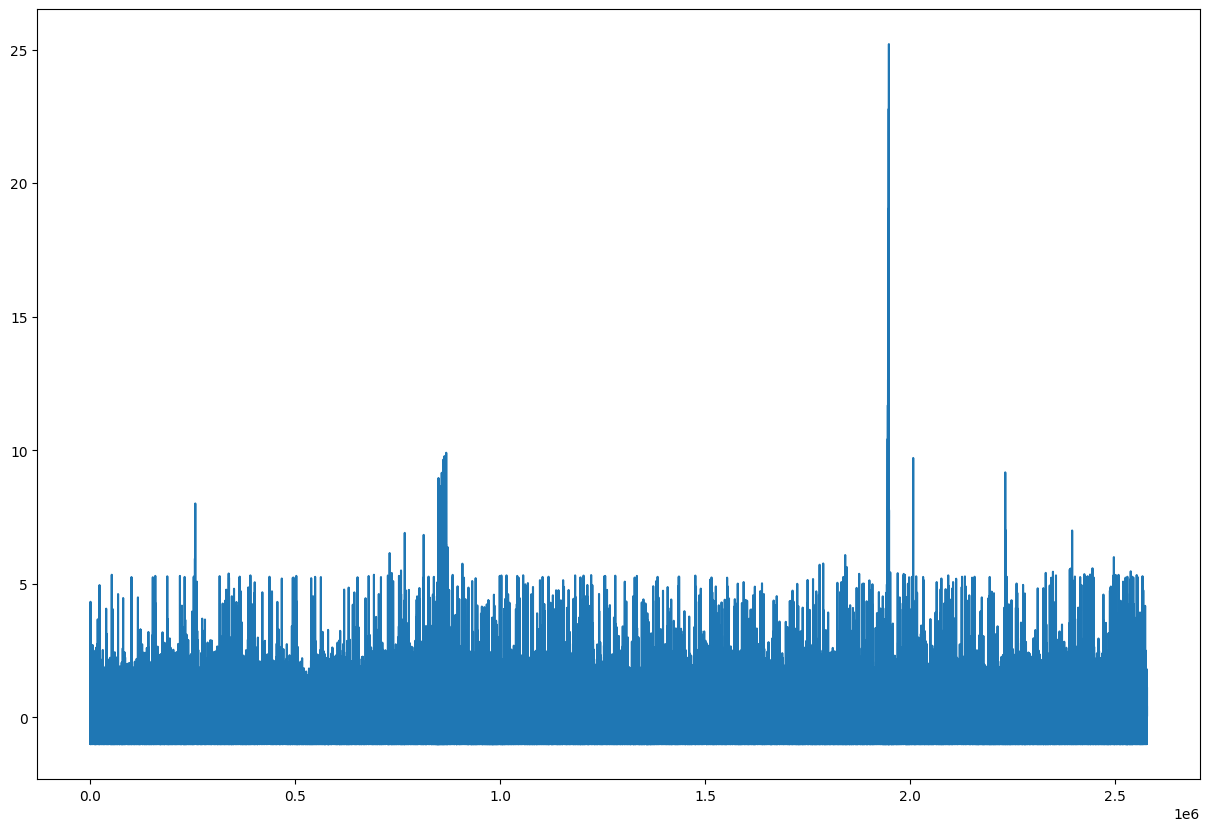

In [ ]:
figure(figsize=(15, 10))
plt.plot(logs_df["target_processing_time"])

Based on the KPSS test, time series is non-stationary.

Based on the plot, time series is homoscedastic.

There are spikes above 0 that can be identified as anomalies

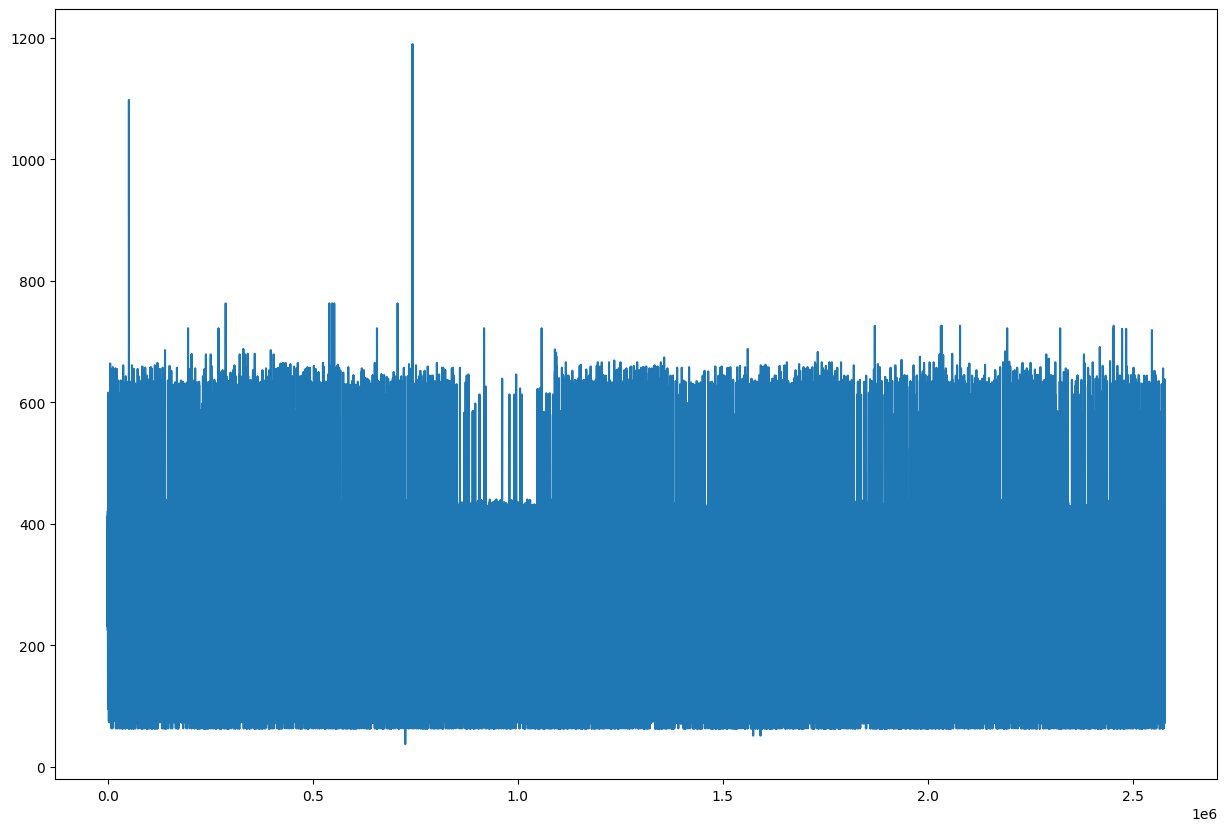

In [ ]:
figure(figsize=(15, 10))
plt.plot(logs_df["received_bytes"])

Based on the KPSS test, time series is non-stationary.

Based on the plot, time series is homoscedastic.

There are spikes above 600 that can be identified as anomalies

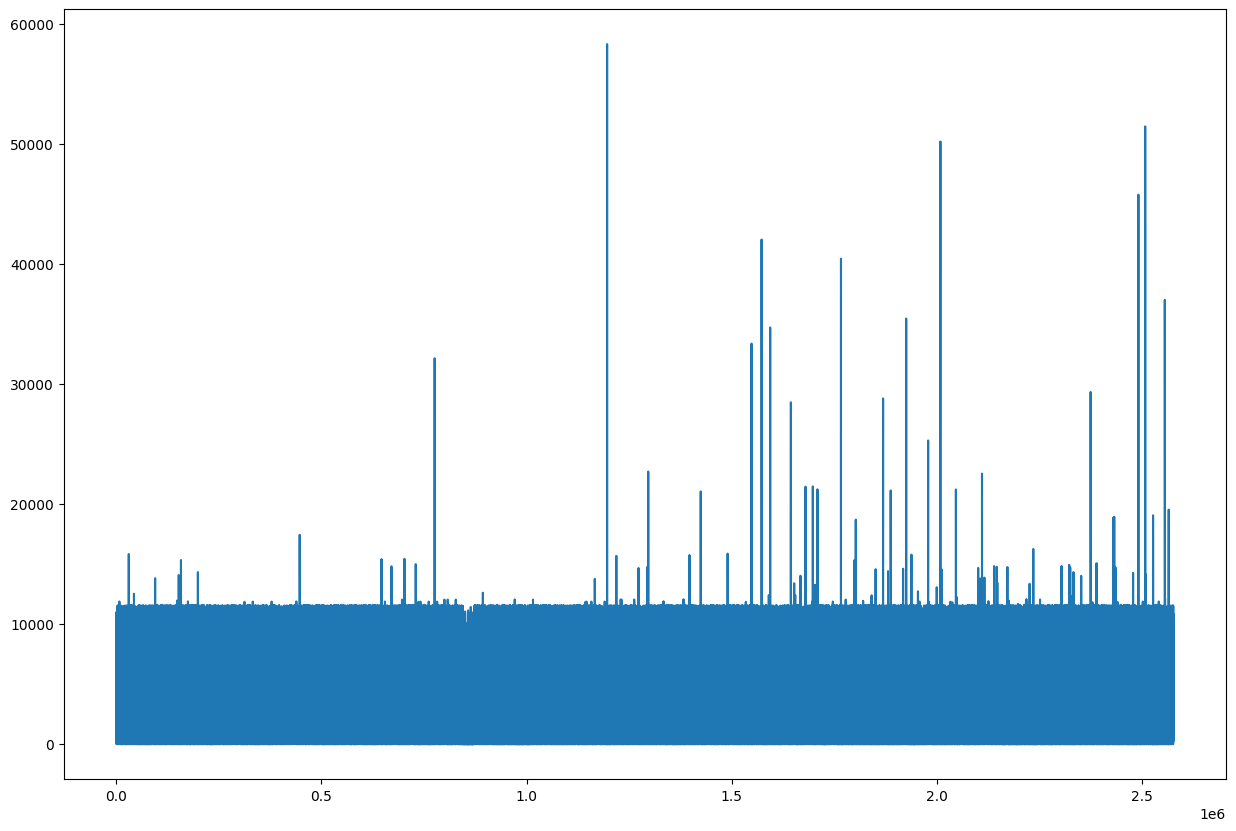

In [ ]:
figure(figsize=(15, 10))
plt.plot(logs_df["sent_bytes"])

Based on the KPSS test, time series is non-stationary.

Based on the plot, time series is homoscedastic.

There are spikes above 10000 that can be identified as anomalies

### 2.

There is no need to apply Box-Cox transformation to stabilize the variance for all time series.

### 3. 4. 5.

In [ ]:
print(logs_df.shape[0])
print(len(np.unique(logs_df["time"].diff())))

2577066
638074


ARIMA() function only accepts univariate time series.

All time series we have are non-uniform time series

https://docs.aws.amazon.com/elasticloadbalancing/latest/application/load-balancer-access-logs.html

Each log entry contains the details of a single request (or connection in the case of WebSockets) made to the load balancer. --> new record is written in the log file when load balancer receives the request from the client --> because of that there is no point in setting a period and interpolating the missing data as nothing happened at that time stamps

To make time series uniform, we can do the following:

1. we set a period

2. for values of numerical columns for timestamps that are missing from the original data we can set the value of 0 as in those timestamps nothing happened, ALB did not make any actions as it did not receive a request

We will set a period on the following way:

1. we will find a greatest common divisor of all differences between timestamps

2. we will express every timestamp as a multiple of the greatest common divisor

Every timestamp will be expressed as the number of elapsed miliseconds since the epoch.

In [ ]:
import datetime as dt
epoch = dt.datetime.utcfromtimestamp(0)
converted_series = logs_df["time"].apply(lambda x: (x - epoch).total_seconds() * 1000.0)
converted_series.head()

0    1.683158e+12
1    1.683158e+12
2    1.683158e+12
3    1.683158e+12
4    1.683158e+12
Name: time, dtype: float64

In [ ]:
converted_series.shape[0]

2577066

In [ ]:
converted_series.diff()[1:]

1           89.028076
2           44.166992
3           50.669922
4           21.532959
5           64.132080
              ...    
2577061     19.277100
2577062    677.197754
2577063     32.223145
2577064     48.553955
2577065     82.984131
Name: time, Length: 2577065, dtype: float64

In [ ]:
num_decimal_places = [len(str(difference).split(".")[1]) for difference in converted_series.diff()[1:]]
max_num_decimal_places = np.max(num_decimal_places)
max_num_decimal_places

12

In [ ]:
int_differences = list()
int_differences = [int(difference * pow(10, 12)) for difference in converted_series.diff()[1:]]
int_differences[:5]

[89028076171875,
 44166992187500,
 50669921875000,
 21532958984375,
 64132080078125]

In [ ]:
greatest_common_divisor = np.gcd.reduce(int_differences)
greatest_common_divisor

244140625

In [ ]:
period = greatest_common_divisor / pow(10, 12)
period

0.000244140625

Period is 0.000244140625 miliseconds

In [ ]:
total_num_timestamps = 0
for int_difference in int_differences:
    total_num_timestamps = total_num_timestamps + int_difference / greatest_common_divisor
int(total_num_timestamps)

2123365634282

Total number of timestamps after setting a period would be 2123365634282

For timestamps that are not in the original data:

1. request_processing_time --> value of 0

2. target_processing_time --> value of 0

3. response_processing_time --> value of 0

4. received_bytes --> value of 0

5. sent_bytes --> value of 0

In [ ]:
#test_df = pd.DataFrame(0, index=np.arange(total_num_timestamps), columns=["test"])

Kernel crashed while executing this line of code as dataframe is too big to fit in the available RAM

We will do the following:

1. first and last timestamp will be fixed

2. the period will be (difference between the first and the last timestamp) / (number of timestamps - 1)

In [ ]:
((logs_df["time"].iloc[logs_df.shape[0] - 1] - epoch).total_seconds() * 1000.0 - (logs_df["time"].iloc[0] - epoch).total_seconds() * 1000.0) / (logs_df.shape[0] - 1)

201.1589979519837

The period is 201.1589979519837 ms

In [ ]:
new_dates_list = list(pd.date_range(start=logs_df["time"].iloc[0], end=logs_df["time"].iloc[logs_df.shape[0] - 1], periods=logs_df.shape[0]))
print(new_dates_list[0] == logs_df["time"].iloc[0])
print(new_dates_list[len(new_dates_list) - 1] == logs_df["time"].iloc[logs_df.shape[0] - 1])

True
True


In [ ]:
new_dates_list[:5]

[Timestamp('2023-05-03 23:55:00.847313'),
 Timestamp('2023-05-03 23:55:01.048471997'),
 Timestamp('2023-05-03 23:55:01.249630995'),
 Timestamp('2023-05-03 23:55:01.450789993'),
 Timestamp('2023-05-03 23:55:01.651948991')]

In [ ]:
logs_df["time"][logs_df["time"] == new_dates_list]

0         2023-05-03 23:55:00.847313
2577065   2023-05-09 23:55:00.660370
Name: time, dtype: datetime64[ns]

In [ ]:
logs_df_new_dates = logs_df.copy(deep=True)
logs_df_new_dates["time"] = new_dates_list
logs_df_new_dates.head()

,type,time,request_processing_time,target_processing_time,response_processing_time,elb_status_code,target_status_code,received_bytes,sent_bytes,request,user_agent,ssl_cipher,target_group_arn,domain_name,request_creation_time,actions_executed,redirect_url,target_status_code_list
0,h2,2023-05-03 23:55:00.847313000,0.000,0.758789,0.0,200,200,375,542,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,2023-05-03T23:55:00.087000Z,forward,-,200
1,h2,2023-05-03 23:55:01.048471997,0.001,0.193970,0.0,200,200,374,2363,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,2023-05-03T23:55:00.741000Z,forward,-,200
2,h2,2023-05-03 23:55:01.249630995,0.001,0.444092,0.0,200,200,374,542,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,2023-05-03T23:55:00.535000Z,forward,-,200
3,h2,2023-05-03 23:55:01.450789993,0.000,0.220947,0.0,200,200,375,5641,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,2023-05-03T23:55:00.809000Z,forward,-,200
4,h2,2023-05-03 23:55:01.651948991,0.001,0.167969,0.0,200,200,375,2532,"[GET, https, endpoint.secret.io, 443, v1/, use...",MightyUserAgent/11.11.0 (com.nvteh.wlc; build:...,ECDHE-RSA-AES128-GCM-SHA256,arn:aws:elasticloadbalancing:us-east-1:1337:ta...,endpoint.secret.io,2023-05-03T23:55:00.884000Z,forward,-,200


In [ ]:
logs_df_new_dates[["time", "request_processing_time"]].to_csv("request_processing_time.csv")

In [ ]:
logs_df_new_dates[["time", "target_processing_time"]].to_csv("target_processing_time.csv")

In [ ]:
logs_df_new_dates[["time", "response_processing_time"]].to_csv("response_processing_time.csv")

In [ ]:
logs_df_new_dates[["time", "received_bytes"]].to_csv("received_bytes.csv")

In [ ]:
logs_df_new_dates[["time", "sent_bytes"]].to_csv("sent_bytes.csv")

![Screenshot 2023-08-22 at 11.57.58.png](<attachment:Screenshot 2023-08-22 at 11.57.58.png>)
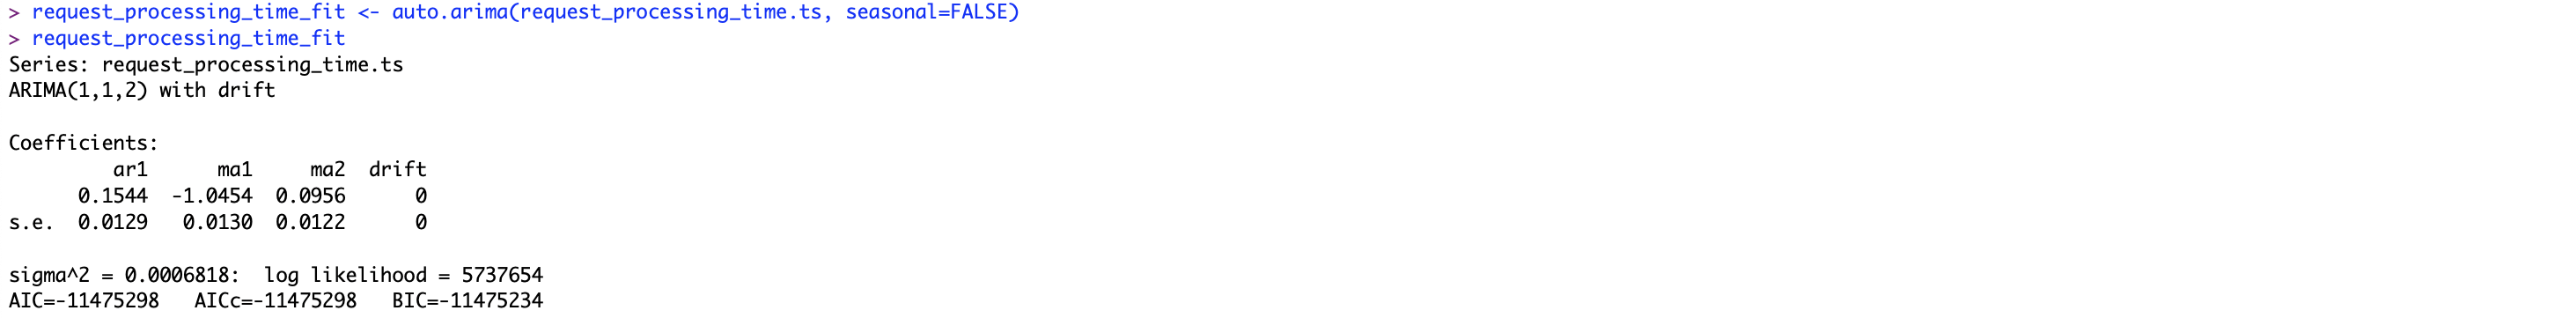

![Screenshot 2023-08-22 at 12.00.30.png](<attachment:Screenshot 2023-08-22 at 12.00.30.png>)
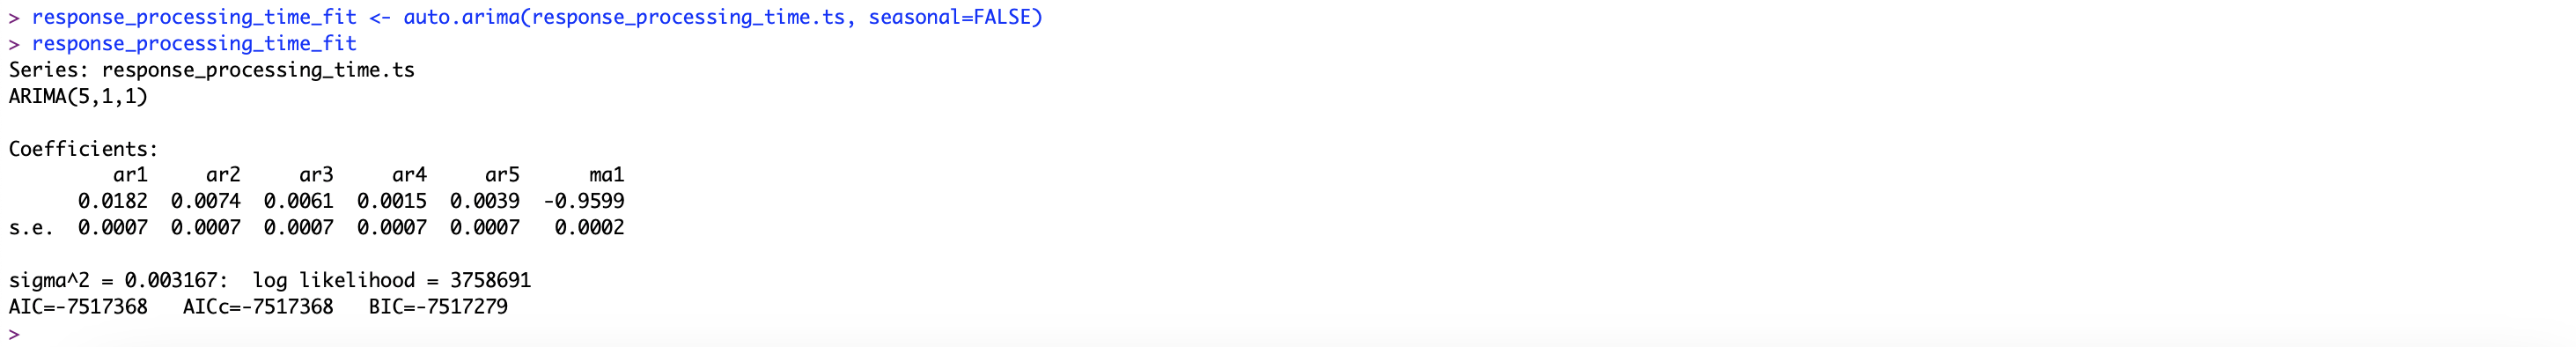

![Screenshot 2023-08-22 at 12.12.44.png](<attachment:Screenshot 2023-08-22 at 12.12.44.png>)
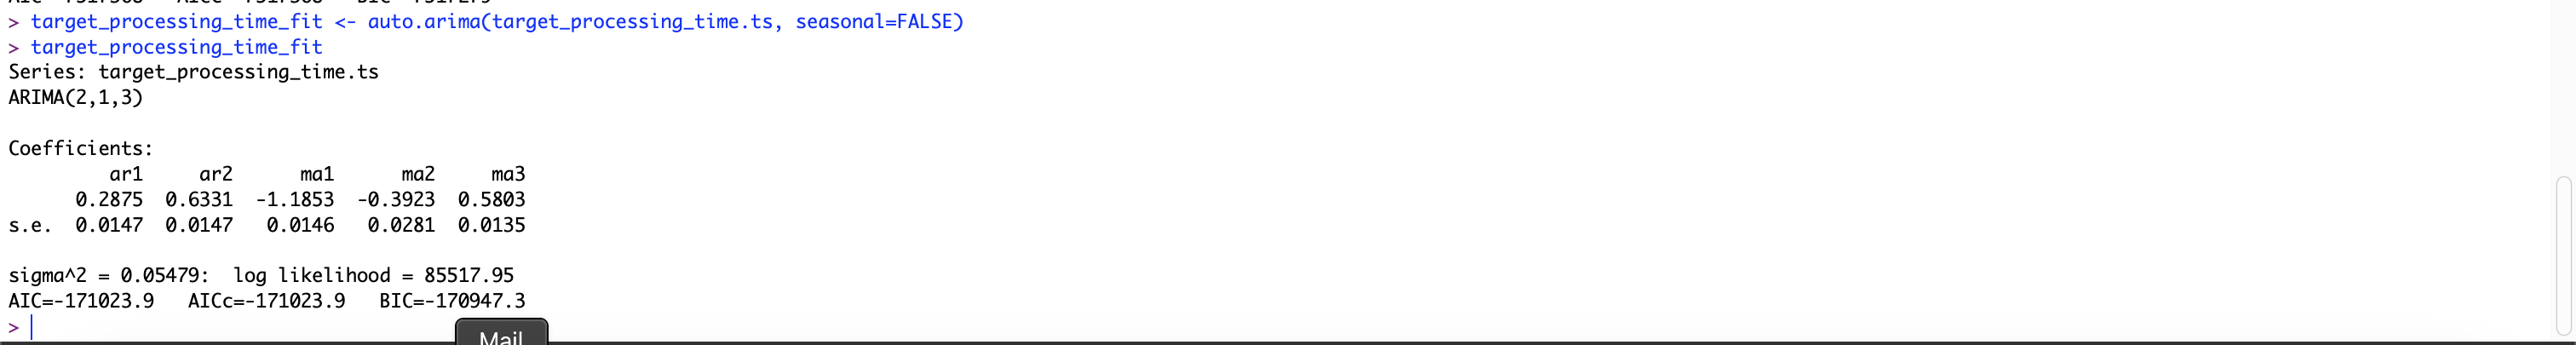

![Screenshot 2023-08-22 at 12.22.12.png](<attachment:Screenshot 2023-08-22 at 12.22.12.png>)
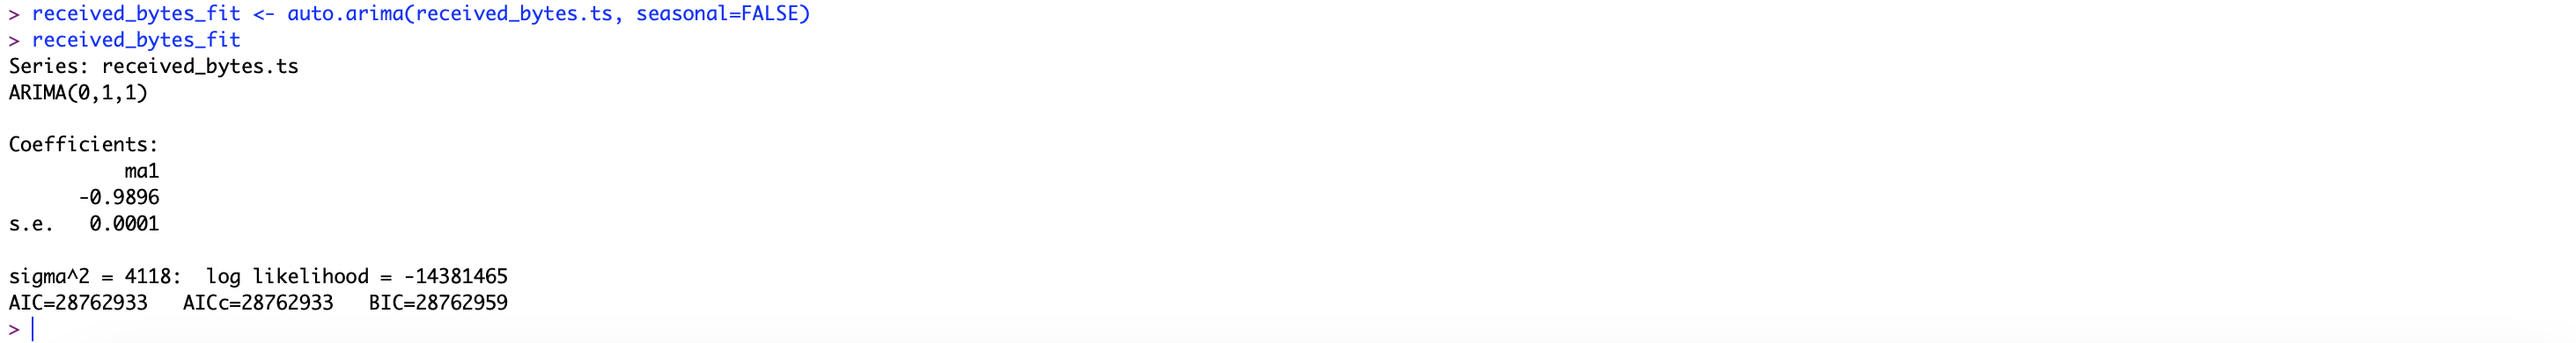

![Screenshot 2023-08-22 at 12.28.10.png](<attachment:Screenshot 2023-08-22 at 12.28.10.png>)
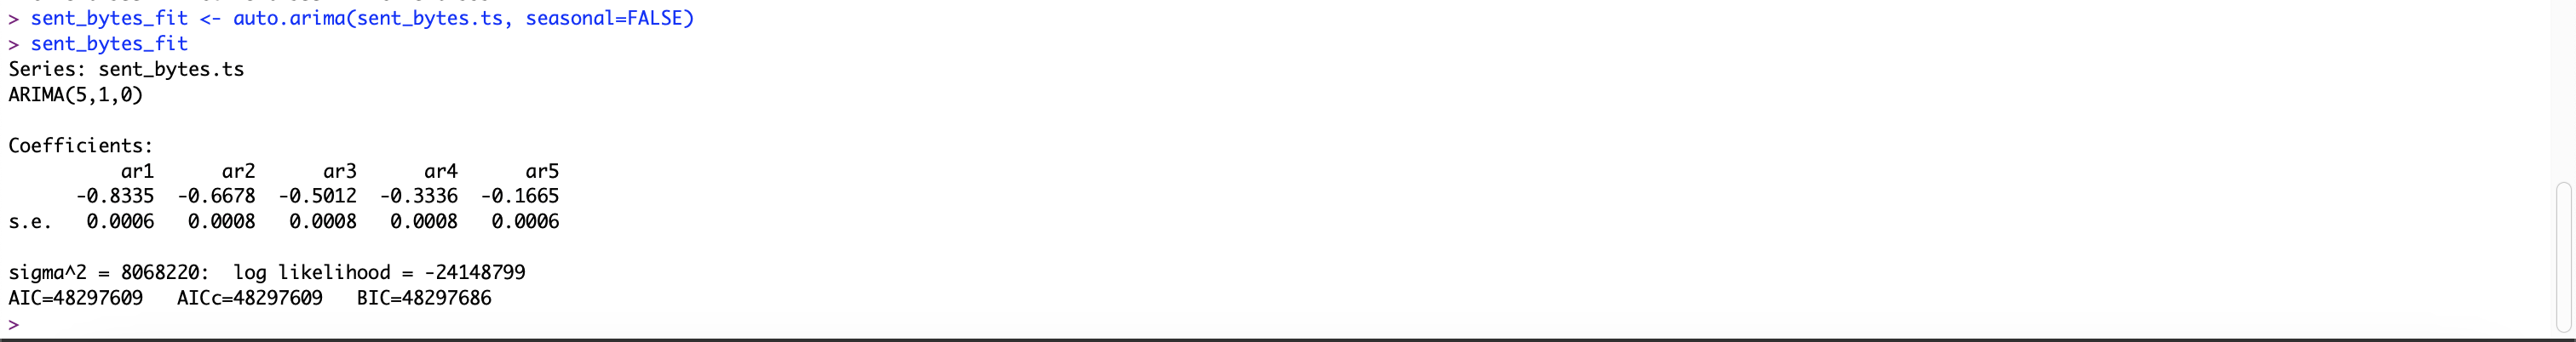